# Import

In [1]:
!pip install feature_engine

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from feature_engine.imputation import MeanMedianImputer
from scipy.stats import skew
from feature_engine.encoding import MeanEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv('Life Expectancy Data.csv')
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2933  ...   67.0               7.13         65.0       33.6  454.366654   
2934  ...    7.0               6.52         68.0       36.7  453.351155   
2935  ...   73.0               6.53         71.0       39.8   57.348340   
2936  ...   76.0               6.16         75.0       42.1  548.587312   
2937  ...   78.0               7.10         78.0       43.5  547.358878   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2933  12777511.0                    9.4                  9.4   
2934  12633897.0                    9.8                  9.9   
2935    125525.0                    1.2                  1.3   
2936  12366165.0                    1.6                  1.7   
2937  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2933                            0.407        9.2  
2934                            0.418        9.5  
2935                            0.427      

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2933     Zimbabwe  2004  Developing              44.3            723.0   
2934     Zimbabwe  2003  Developing              44.5            715.0   
2935     Zimbabwe  2002  Developing              44.8             73.0   
2936     Zimbabwe  2001  Developing              45.3            686.0   
2937     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2933             27     4.36                0.000000         68.0        31   
2934             26     4.06                0.000000          7.0       998   
2935             25     4.43                0.000000         73.0       304   
2936             25     1.72                0.000000         76.0       529   
2937             24     1.68                0.000000         79.0      1483   

       BMI   under-five deaths   Polio  Total expenditure  Diphtheria   \
0      19.1                  83    6.0               8.16         65.0   
1      18.6                  86   58.0               8.18         62.0   
2      18.1                  89   62.0               8.13         64.0   
3      17.6                  93   67.0               8.52         67.0   
4      17.2                  97   68.0               7.87         68.0   
...     ...                 ...    ...                ...          ...   
2933   27.1                  42   67.0               7.13         65.0   
2934   26.7                  41    7.0               6.52         68.0   
2935   26.3                  40   73.0               6.53         71.0   
2936   25.9                  39   76.0               6.16         75.0   
2937   25.5                  39   78.0               7.10         78.0   

       HIV/AIDS         GDP  Population   thinness  1-19 years  \
0           0.1  584.259210  33736494.0                   17.2   
1           0.1  612.696514    327582.0                   17.5   
2           0.1  631.744976  31731688.0                   17.7   
3           0.1  669.959000   3696958.0                   17.9   
4           0.1   63.537231   2978599.0                   18.2   
...         ...         ...         ...                    ...   
2933       33.6  454.366654  12777511.0                    9.4   
2934       36.7  453.351155  12633897.0                    9.8   
2935       39.8   57.348340    125525.0                    1.2   
2936       42.1  548.587312  12366165.0                    1.6   
2937       43.5  547.358878  12222251.0                   11.0   

       thinness 5-9 years  Income composition of resources  Schooling  
0                    17.3                            0.479       10.1  
1                    17.5                            0.476       10.0  
2                    17.7                            0.470        9.9  
3                    18.0                            0.463        9.8  
4                    18.2                            0.454        9.5  
...                   ...                              ...

## Domain knowledge

**here is domain knowledges of features in dataset:**


*   *country : Country under study*

*   *year : year*

*   *status : Status of the country's development*

*   *population : Population of country*

*   *Hepatitis B : Percentage of people finally one year old who were immunized against hepatitis B*
*   *Measles : The number of reported measles cases per 1000 people*

*   *polio : Percentage of 1-year-olds immunized against polio*

*   *Diphtheria : Percentage of people finally one year old who were immunized against diphtheria*

*   *HIV/AIDS : The number of deaths caused by AIDS of the last 4-year-olds who were born alive per 1000 people*

*   *infant deaths : The number of infant deaths per 1000 people*

*   *under-five deaths : he number of deaths of people under 5 years old per 1000 people*

*   *Total expenditure : The ratio of government medical-health expenses to total government expenses in percentage*
*   *GDP : Gross domestic product*

*   *BMI : The average body mass index of the entire population of the country*

*   *thinness 1-19 years : Prevalence of thinness among people 19 years old in percentage*
*   *Alcohol : Liters of alcohol consumption among people over 15 years old*


*   *Schooling  : The number of years that people study*

*  *Life expectancy [target variable] : Country life expectancy*





# Data preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

##Imputation

In [7]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
df.dropna(subset = ['Life expectancy ','Adult Mortality',' thinness  1-19 years',' thinness 5-9 years','Polio','Diphtheria ',' BMI '] , inplace = True)

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            175
percentage expenditure               0
Hepatitis B                        525
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                  212
Diphtheria                           0
 HIV/AIDS                            0
GDP                                435
Population                         644
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    160
Schooling                          160
dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
  df.drop(labels=["Life expectancy "], axis=1),
  df["Life expectancy "],
  test_size=0.2,
  random_state=0
)
X_train.shape

(2310, 21)

In [12]:
X_test.shape

(578, 21)

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>,
        <Axes: title={'center': ' BMI '}>],
       [<Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>,
        <Axes: title={'center': 'Diphtheria '}>],
       [<Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': ' thinness  1-19 years'}>],
       [<Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center': 'Schooling'}>, <Axes: >]], dtype=object)

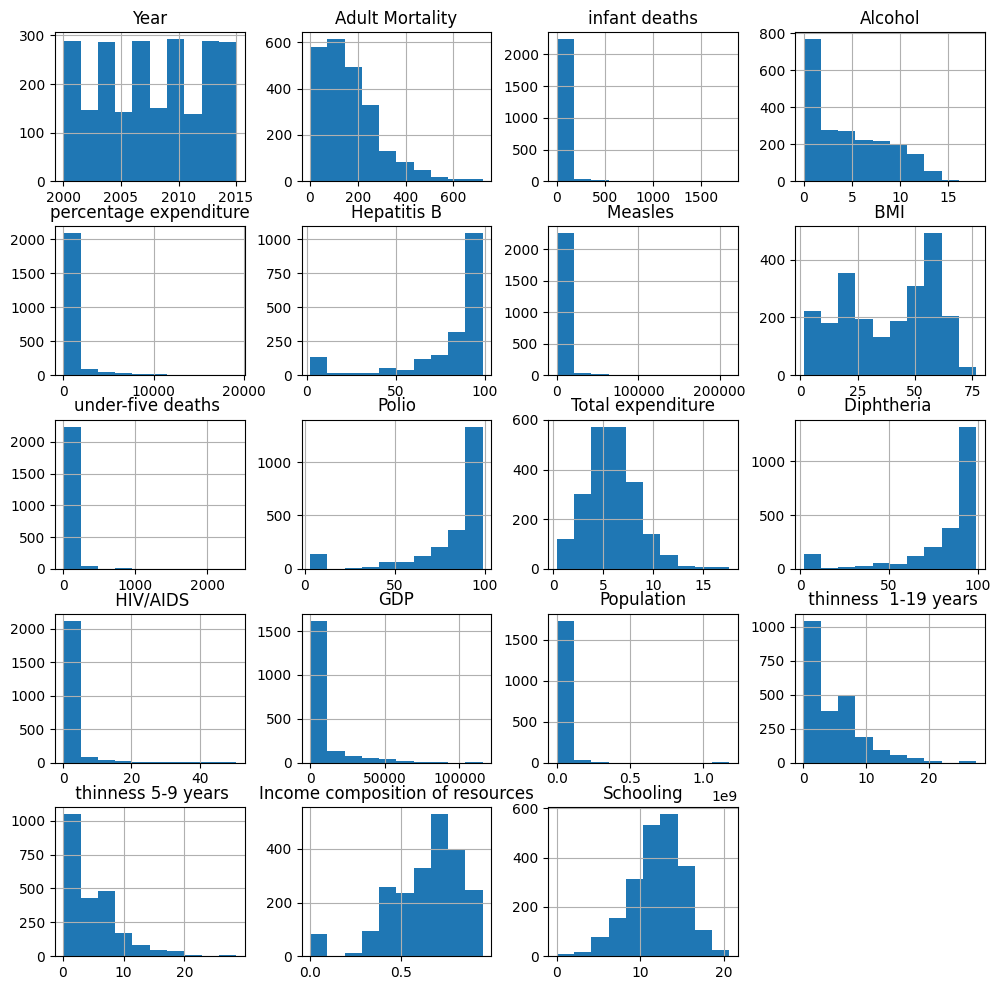

In [13]:
X_train.hist(figsize = (12,12))



*   alcohal -  median
*   hepatit b - median

*   total expendentits - mean
*   GDP - median

*   population - in orther to country progress(median probably)

*   Income composition of resources - median
*   schooling - mean






In [14]:
imputer1 = MeanMedianImputer(
imputation_method="median",
variables=["Alcohol","Hepatitis B","GDP","Income composition of resources","Population"],
)
imputer2 = MeanMedianImputer(
imputation_method="mean",
variables=["Total expenditure","Schooling"],
)

In [15]:
imputer1.fit(X_train)
X_train = imputer1.transform(X_train)
X_test = imputer1.transform(X_test)
imputer2.fit(X_train)
X_train = imputer2.transform(X_train)
X_test = imputer2.transform(X_test)

In [16]:
X_train.isna().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [17]:
X_test.isna().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>,
        <Axes: title={'center': ' BMI '}>],
       [<Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>,
        <Axes: title={'center': 'Diphtheria '}>],
       [<Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': ' thinness  1-19 years'}>],
       [<Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center': 'Schooling'}>, <Axes: >]], dtype=object)

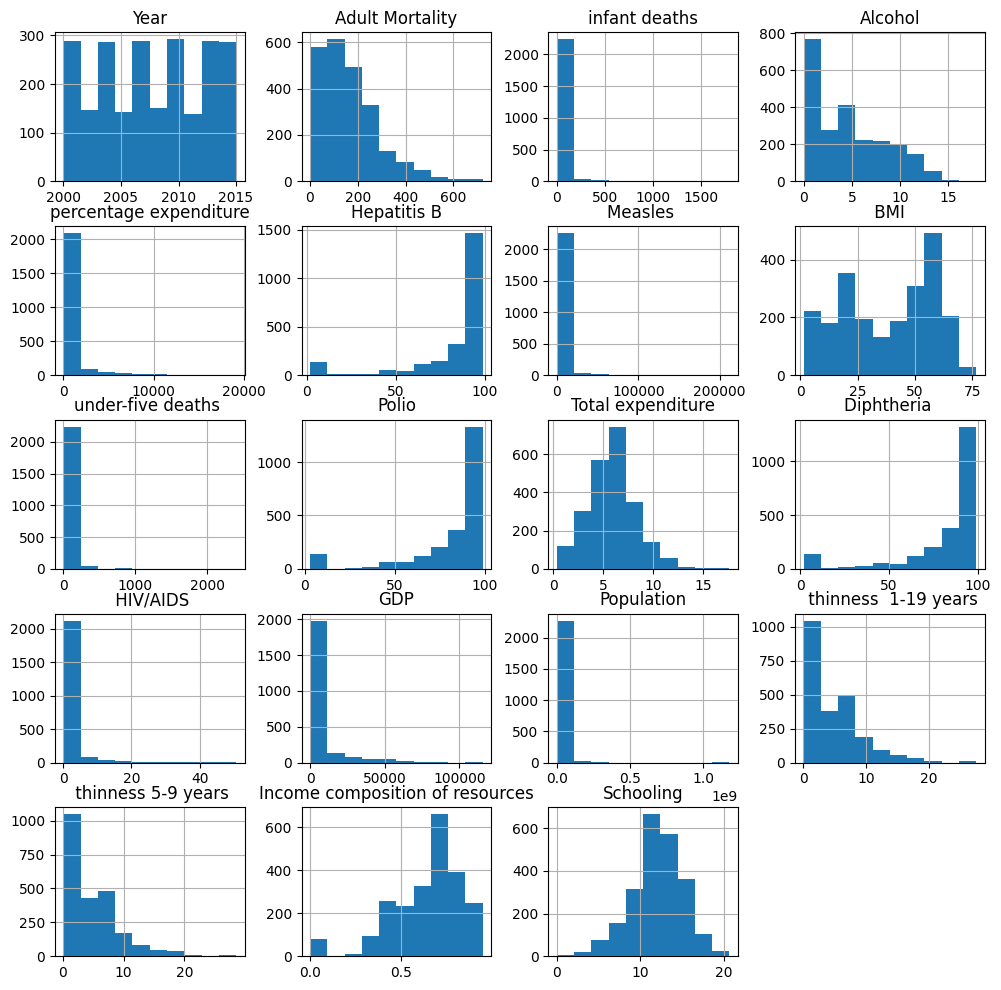

In [18]:
X_train.hist(figsize = (12,12))

##Outliers detection

In [19]:
numerical = X_train.select_dtypes(
exclude="O").columns.to_list()
def plot_box():
  plt.figure(figsize=(16,60))
  sns.set_style(style='whitegrid')
  c=1
  for i in numerical:
    plt.subplot(len(numerical),1,c)
    sns.boxplot(x=i,data=X_train)
    c+=1

 **normal :**
*      Total expenditure
*      Schooling

**poisson :**
    

*   Adult Mortality
*   Alcohol


*    thinness  1-19 years
*    thinness 5-9 years

In [20]:
# using z score for poisson distrbution
poisson = ['Adult Mortality',
           'Alcohol',
           ' thinness  1-19 years',
           ' thinness 5-9 years']
for i in poisson:
    TRz_score = (X_train[i] - np.mean(X_train[i])) / np.std(X_train[i])
    TEz_score = (X_test[i] - np.mean(X_train[i])) / np.std(X_train[i])
    y_train.drop(TRz_score[(TRz_score > 2)| (TRz_score < -2)].index,inplace = True)
    X_train.drop(TRz_score[(TRz_score > 2)| (TRz_score < -2)].index,inplace = True)
    y_test.drop(TEz_score[(TEz_score > 2)| (TEz_score < -2)].index,inplace = True)
    X_test.drop(TEz_score[(TEz_score > 2)| (TEz_score < -2)].index,inplace = True)


In [21]:
# normal
normal = ['Total expenditure',
          'Schooling']
for i in normal:
  IQR = X_train[i].quantile(0.75) - X_train[i].quantile(0.25)
  y_train.drop(X_train[(X_train[i].values< (X_train[i].quantile(0.25)-1.5*IQR)) | (X_train[i].values> (X_train[i].quantile(0.75)+1.5*IQR))].index,inplace = True)
  y_test.drop(X_test[(X_test[i].values<(X_train[i].quantile(0.25)-1.5*IQR)) | (X_test[i].values>(X_train[i].quantile(0.75)+1.5*IQR))].index,inplace = True)
  X_test.drop(X_test[(X_test[i].values<(X_train[i].quantile(0.25)-1.5*IQR)) | (X_test[i].values>(X_train[i].quantile(0.75)+1.5*IQR))].index,inplace = True)
  X_train.drop(X_train[(X_train[i].values<(X_train[i].quantile(0.25)-1.5*IQR)) | (X_train[i].values>(X_train[i].quantile(0.75)+1.5*IQR))].index,inplace = True)

In [22]:
X_train.shape

(1818, 21)

In [23]:
X_test.shape

(465, 21)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

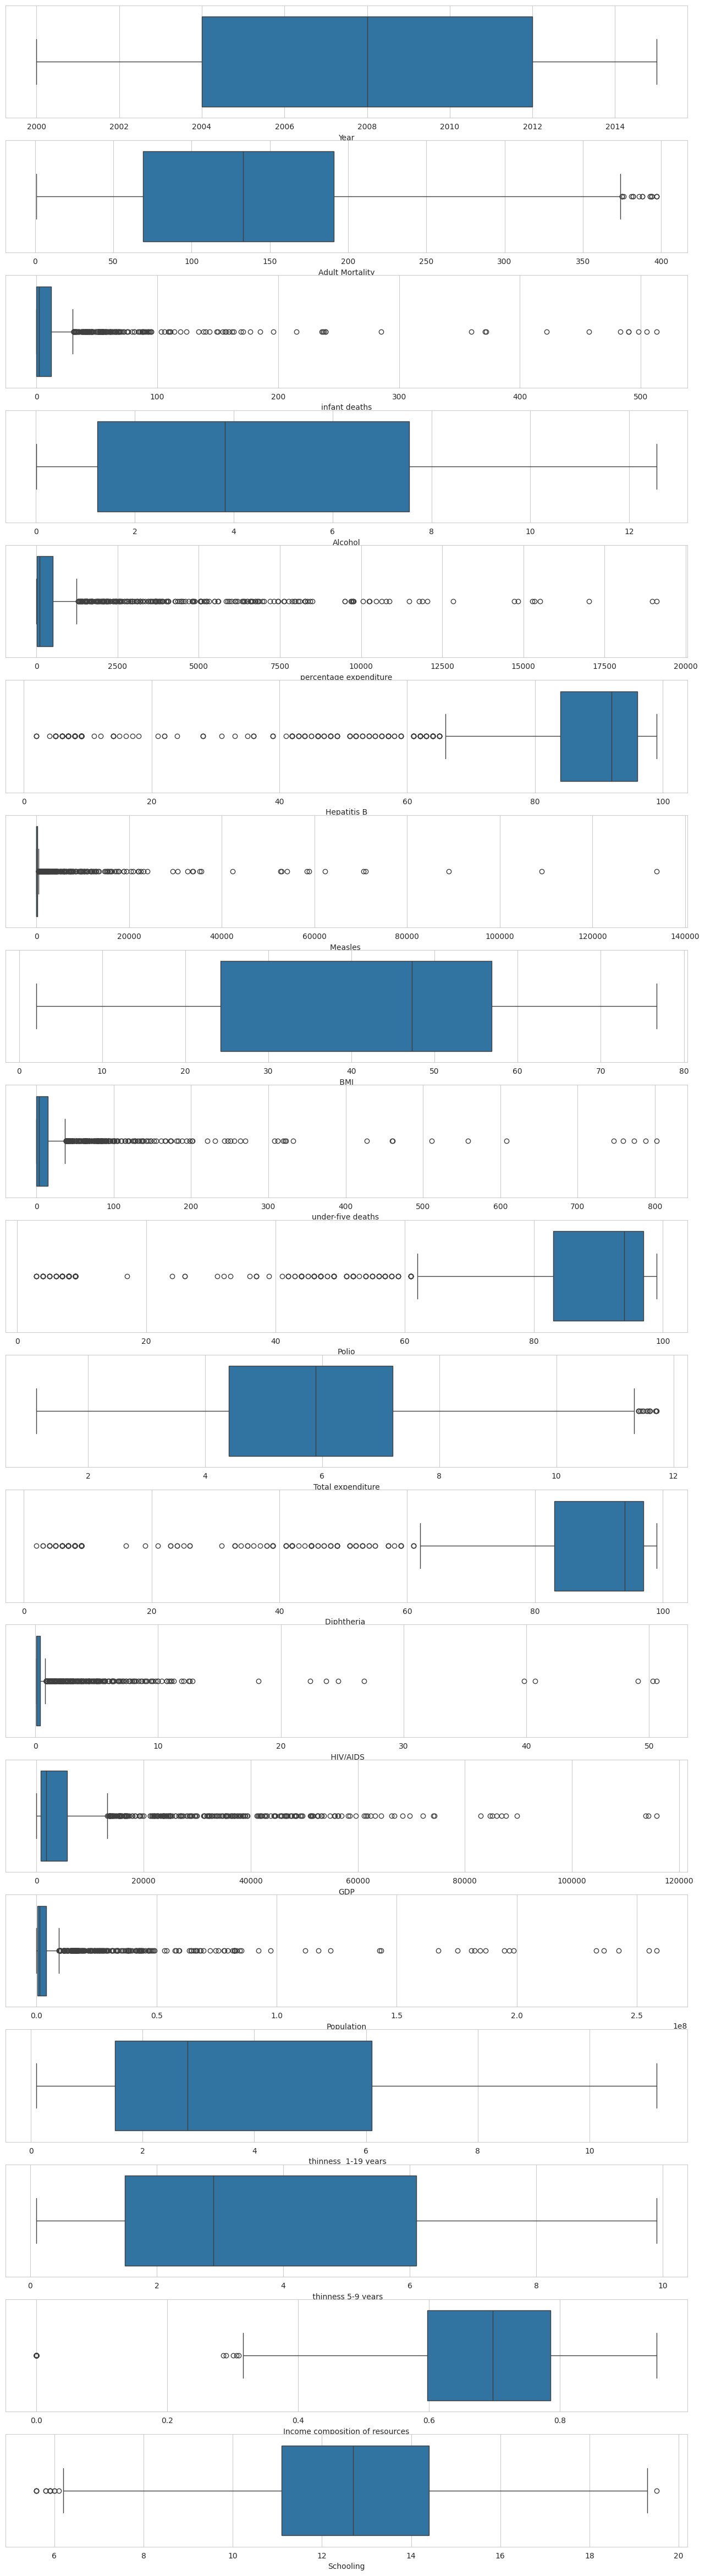

In [24]:
plot_box()

##EDA

In [25]:
X_train.describe()

Year  Adult Mortality  infant deaths      Alcohol  \
count  1818.000000      1818.000000    1818.000000  1818.000000   
mean   2007.839934       139.738724      15.250825     4.665391   
std       4.616165        94.059112      43.822613     3.704880   
min    2000.000000         1.000000       0.000000     0.010000   
25%    2004.000000        69.000000       0.000000     1.240000   
50%    2008.000000       133.000000       2.000000     3.820000   
75%    2012.000000       191.000000      12.000000     7.545000   
max    2015.000000       397.000000     513.000000    12.550000   

       percentage expenditure  Hepatitis B       Measles          BMI   \
count             1818.000000  1818.000000    1818.000000  1818.000000   
mean               774.015014    83.515402    1376.100660    41.305721   
std               1978.070096    23.179376    6924.285782    19.147769   
min                  0.000000     2.000000       0.000000     2.100000   
25%                  6.058408    84.000000       0.000000    24.225000   
50%                 97.190352    92.000000       7.000000    47.300000   
75%                507.580562    96.000000     171.500000    56.900000   
max              19099.045060    99.000000  133802.000000    76.700000   

       under-five deaths         Polio  Total expenditure  Diphtheria   \
count         1818.000000  1818.000000        1818.000000  1818.000000   
mean            20.795930    84.577558           5.816863    84.199120   
std             61.197216    22.567133           2.145303    23.025911   
min              0.000000     3.000000           1.120000     2.000000   
25%              0.000000    83.000000           4.400000    83.000000   
50%              3.000000    94.000000           5.892833    94.000000   
75%             15.000000    97.000000           7.200000    97.000000   
max            802.000000    99.000000          11.710000    99.000000   

          HIV/AIDS            GDP    Population   thinness  1-19 years  \
count  1818.000000    1818.000000  1.818000e+03            1818.000000   
mean      0.958306    7226.080445  7.478879e+06               3.753135   
std       3.164640   13682.144426  2.264414e+07               2.705412   
min       0.100000       1.681350  4.300000e+01               0.100000   
25%       0.100000     758.837285  4.200308e+05               1.500000   
50%       0.100000    1792.384500  1.334515e+06               2.800000   
75%       0.400000    5724.825032  3.994631e+06               6.100000   
max      50.600000  115761.577000  2.581621e+08              11.200000   

        thinness 5-9 years  Income composition of resources    Schooling  
count          1818.000000                      1818.000000  1818.000000  
mean              3.745820                         0.668544    12.636756  
std               2.710138                         0.180062     2.618161  
min               0.100000                         0.000000     5.600000  
25%               1.500000                         0.597250    11.100000  
50%               2.900000                         0.698000    12.700000  
75%               6.100000                         0.786000    14.400000  
max               9.900000                         0.948000    19.500000

In [26]:
X_train['infant deaths'].quantile(0.3)

0.0

In [27]:
X_train['Measles '].quantile(0.3)

0.0

In [28]:
X_train['Polio'].quantile(0.06)

37.0

**concolusion :**


*   in 30% of years in overall countries there was no infant death
*   in 30% of years in overall countries no Measles reported
*   In 5% of overall countries the polio number was less than 10 and In other 95% was more than 35


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Status', ylabel='Count'>

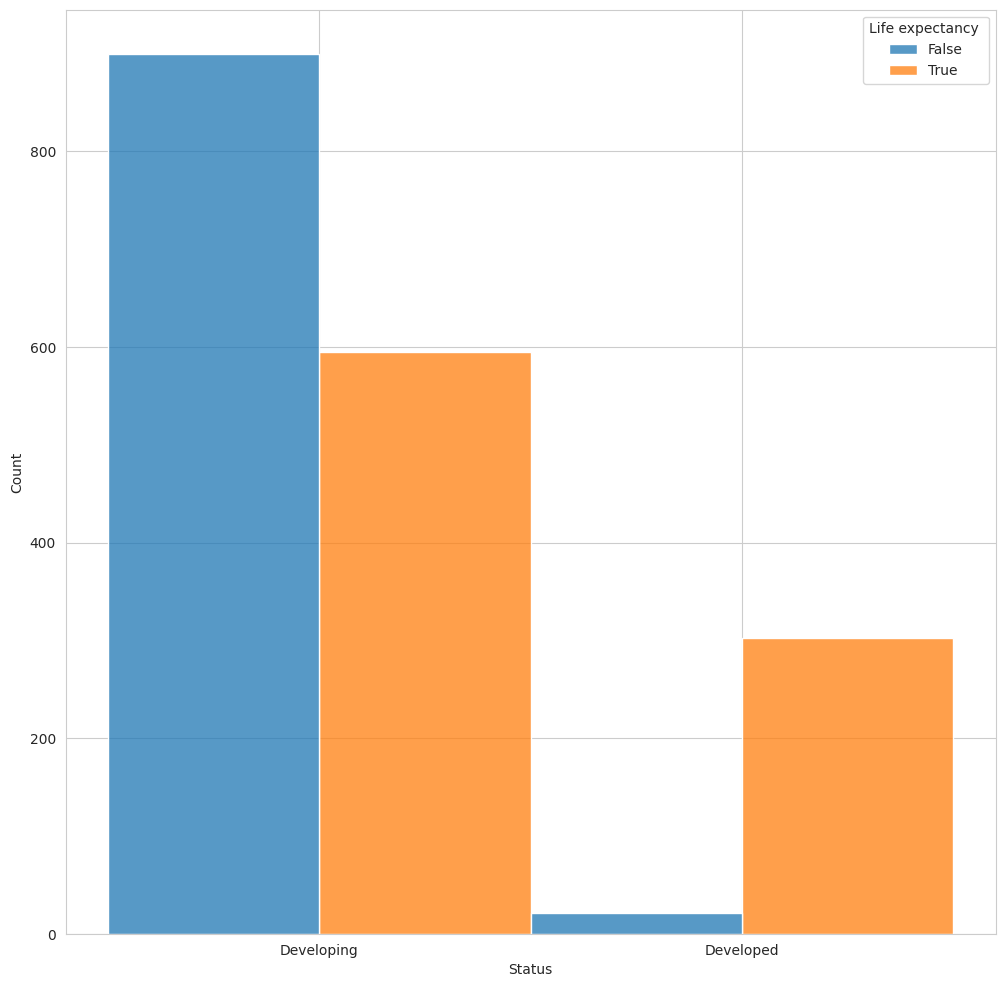

In [29]:
plt.figure(figsize=(12,12))
plt.subplot(1,1,1)
sns.histplot(x='Status',data = X_train,hue=(y_train > 73),stat="count",multiple="dodge")

In [30]:
1500 / 1818

0.8250825082508251

In [31]:
y_train.median()

73.0

In [32]:
#over 75 divide by under 75 life expectancy
#developed
300 / 20

15.0

In [33]:
#developing
590 / 930

0.6344086021505376

In [34]:
300 / 320

0.9375

In [35]:
590 / 1520

0.3881578947368421

**Concolusion:**
 If  we consider life expectancy median(75) as threshold , then 93 percent of developed countries have more than 75 life expectancy while only  38 precent of developing countries have it.massive difference!

##Encoding

In [36]:
mean_enc = MeanEncoder(variables=['Status','Country'])

In [37]:
mean_enc.fit(X_train, y_train)
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) Country.
  warnings.warn(


In [38]:
X_train

Country  Year     Status  Adult Mortality  infant deaths  Alcohol  \
1399  73.820000  2010  69.294515             86.0              1     0.01   
1997  73.191667  2009  69.294515            155.0              3     5.39   
1044  73.218182  2013  69.294515            144.0              0     8.25   
2381  53.600000  2011  69.294515            329.0             51     0.01   
2086  76.980000  2000  69.294515             88.0              0     0.50   
...         ...   ...        ...              ...            ...      ...   
1735  75.277778  2012  69.294515             11.0              0     0.01   
837   55.509091  2012  69.294515            337.0              3    11.89   
1656  63.109091  2010  69.294515            214.0              8     0.01   
2656  70.933333  2008  69.294515            185.0              0     6.41   
2782  56.733333  2011  69.294515            348.0             88     4.04   

      percentage expenditure  Hepatitis B  Measles    BMI   \
1399             2009.575605         99.0        13   68.4   
1997               30.935195         85.0         0   45.6   
1044              780.445928         97.0         0   46.5   
2381                0.000000         92.0     17298   22.4   
2086             1559.287158         89.0        46   62.4   
...                      ...          ...       ...    ...   
1735              648.133178          9.0         0    6.2   
837              1500.412635         92.0      1190   23.0   
1656                8.353075         64.0      1292   27.4   
2656             1902.693048          9.0         0    4.2   
2782                0.000000          9.0      1622   21.3   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
1399                   1   98.0           2.760000         98.0        0.1   
1997                   3   81.0           9.140000         85.0        0.1   
1044                   0   98.0           6.150000         97.0        0.1   
2381                  82   49.0           5.892833         41.0        0.8   
2086                   0   91.0           2.180000          8.0        0.1   
...                  ...    ...                ...          ...        ...   
1735                   0   94.0           7.250000         94.0        0.1   
837                    4    3.0           4.000000         24.0        8.2   
1656                  12   52.0           3.280000         64.0        1.2   
2656                   0   91.0           4.400000          9.0        0.3   
2782                 128   88.0           5.720000          9.0        3.1   

               GDP  Population   thinness  1-19 years   thinness 5-9 years  \
1399  38497.616960   1334515.0                    3.3                  3.2   
1997   2599.596259   6127837.0                    2.1                  2.0   
1044   7955.615985   1334515.0                    3.8                  3.8   
2381   1792.384500   1334515.0                    6.9                  6.7   
2086  29986.291500   1334515.0                    4.8                  4.5   
...            ...         ...                    ...                  ...   
1735   6586.719290      6261.0                    1.9                  1.9   
837   21557.652800    138593.0                    8.7                  8.7   
1656    123.383675    369543.0                    8.7                  8.5   
2656  21188.118570   1315372.0                    6.1                  6.4   
2782   1792.384500   1334515.0                    7.0                  6.9   

      Income composition of resources  Schooling  
1399                            0.790  13.500000  
1997                            0.663  12.100000  
1044                            0.746  15.800000  
2381                            0.681  12.091644  
2086                            0.808  13.000000  
...                               ...        ...  
1735                            0.797  15.100000  
837                             0.583   9.200000  
1656 

In [39]:
X_train['Status'].value_counts()

Status
69.294515    1495
79.424458     323
Name: count, dtype: int64

# feature engineering

## creating features(regular information)

In [40]:
#Health Expenditure per GDP
X_train['HE per GDP'] = X_train['Total expenditure'] / X_train['GDP']
X_test['HE per GDP'] = X_test['Total expenditure'] / X_test['GDP']

In [41]:
#Immunization Coverage
X_train['Immunization Coverage'] = (X_train['Hepatitis B'] + X_train['Polio'] + X_train['Diphtheria '])/3
X_test['Immunization Coverage'] = (X_test['Hepatitis B'] + X_test['Polio'] + X_test['Diphtheria '])/3

In [42]:
#Disease Burden
X_train['Disease Burden'] = X_train['Measles '] + X_train[' HIV/AIDS'] + X_train['infant deaths'] + X_train['under-five deaths ']
X_test['Disease Burden'] = X_test['Measles '] + X_test[' HIV/AIDS'] + X_test['infant deaths'] + X_test['under-five deaths ']

In [43]:
#Health Resources
X_train['Health Resources'] = X_train['Total expenditure'] / X_train['Population']
X_test['Health Resources'] = X_test['Total expenditure'] / X_test['Population']

In [44]:
#Education and Health
X_train['Education and Health'] = X_train['Total expenditure'] * X_train['Schooling']
X_test['Education and Health'] = X_test['Total expenditure'] * X_test['Schooling']

In [45]:
#Alcohol Consumption and BMI
X_train['ACB'] = X_train['Alcohol'] * X_train[' BMI ']
X_test['ACB'] = X_test['Alcohol'] * X_test[' BMI ']

In [46]:
#thitness and health
X_train['thitness and health'] = X_train['Total expenditure'] * X_train[' thinness  1-19 years']
X_test['thitness and health'] = X_test['Total expenditure'] * X_test[' thinness  1-19 years']

In [47]:
#Economic health Index
X_train['EHI'] = (X_train['GDP'] * X_train['Total expenditure']) / X_train['Population']
X_test['EHI'] = (X_test['GDP'] * X_test['Total expenditure']) / X_test['Population']

In [48]:
#Population grouth impact
X_train['PGI'] = X_train['Population'] / X_train['Year']
X_test['PGI'] = X_test['Population'] / X_test['Year']

In [49]:
X_train

Country  Year     Status  Adult Mortality  infant deaths  Alcohol  \
1399  73.820000  2010  69.294515             86.0              1     0.01   
1997  73.191667  2009  69.294515            155.0              3     5.39   
1044  73.218182  2013  69.294515            144.0              0     8.25   
2381  53.600000  2011  69.294515            329.0             51     0.01   
2086  76.980000  2000  69.294515             88.0              0     0.50   
...         ...   ...        ...              ...            ...      ...   
1735  75.277778  2012  69.294515             11.0              0     0.01   
837   55.509091  2012  69.294515            337.0              3    11.89   
1656  63.109091  2010  69.294515            214.0              8     0.01   
2656  70.933333  2008  69.294515            185.0              0     6.41   
2782  56.733333  2011  69.294515            348.0             88     4.04   

      percentage expenditure  Hepatitis B  Measles    BMI   \
1399             2009.575605         99.0        13   68.4   
1997               30.935195         85.0         0   45.6   
1044              780.445928         97.0         0   46.5   
2381                0.000000         92.0     17298   22.4   
2086             1559.287158         89.0        46   62.4   
...                      ...          ...       ...    ...   
1735              648.133178          9.0         0    6.2   
837              1500.412635         92.0      1190   23.0   
1656                8.353075         64.0      1292   27.4   
2656             1902.693048          9.0         0    4.2   
2782                0.000000          9.0      1622   21.3   

      under-five deaths   Polio  Total expenditure  Diphtheria    HIV/AIDS  \
1399                   1   98.0           2.760000         98.0        0.1   
1997                   3   81.0           9.140000         85.0        0.1   
1044                   0   98.0           6.150000         97.0        0.1   
2381                  82   49.0           5.892833         41.0        0.8   
2086                   0   91.0           2.180000          8.0        0.1   
...                  ...    ...                ...          ...        ...   
1735                   0   94.0           7.250000         94.0        0.1   
837                    4    3.0           4.000000         24.0        8.2   
1656                  12   52.0           3.280000         64.0        1.2   
2656                   0   91.0           4.400000          9.0        0.3   
2782                 128   88.0           5.720000          9.0        3.1   

               GDP  Population   thinness  1-19 years   thinness 5-9 years  \
1399  38497.616960   1334515.0                    3.3                  3.2   
1997   2599.596259   6127837.0                    2.1                  2.0   
1044   7955.615985   1334515.0                    3.8                  3.8   
2381   1792.384500   1334515.0                    6.9                  6.7   
2086  29986.291500   1334515.0                    4.8                  4.5   
...            ...         ...                    ...                  ...   
1735   6586.719290      6261.0                    1.9                  1.9   
837   21557.652800    138593.0                    8.7                  8.7   
1656    123.383675    369543.0                    8.7                  8.5   
2656  21188.118570   1315372.0                    6.1                  6.4   
2782   1792.384500   1334515.0                    7.0                  6.9   

      Income composition of resources  Schooling  HE per GDP  \
1399                            0.790  13.500000    0.000072   
1997                            0.663  12.100000    0.003516   
1044                            0.746  15.800000    0.000773   
2381                            0.681  12.091644    0.003288   
2086                            0.808  13.000000    0.000073   
...                               ...        ...         ...   
1735            

##feature selection

In [50]:
from sklearn.feature_selection import mutual_info_regression

In [51]:
def score_dataset(X, y, model=XGBRegressor()):
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_error",
    )
    score = score.mean()
    return score

In [52]:
def make_mi_scores(X, y):
    X = X.copy()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [53]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [54]:
mi_scores = make_mi_scores(X_train, y_train)

In [55]:
mi_scores

Country                            1.487081
Adult Mortality                    1.206820
Income composition of resources    0.906949
 thinness 5-9 years                0.753370
 thinness  1-19 years              0.739569
Schooling                          0.679101
 BMI                               0.608684
 HIV/AIDS                          0.458803
thitness and health                0.435561
Education and Health               0.378578
under-five deaths                  0.376547
infant deaths                      0.357234
GDP                                0.300204
Alcohol                            0.296822
ACB                                0.295464
percentage expenditure             0.286865
Polio                              0.258551
Diphtheria                         0.244908
Total expenditure                  0.244904
HE per GDP                         0.220727
Immunization Coverage              0.216554
Status                             0.183678
Hepatitis B                     

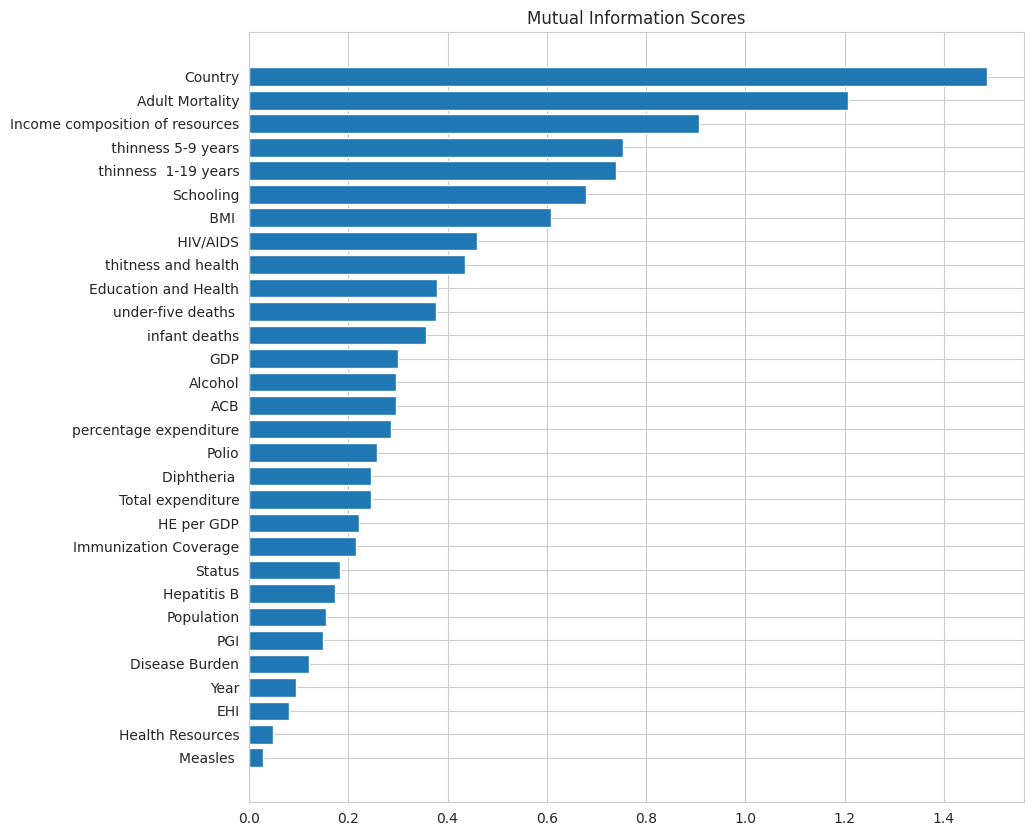

In [56]:
plt.figure(dpi=100, figsize=(10, 10))
plot_mi_scores(mi_scores)

In [57]:
Sorted = list(mi_scores.index)
Sorted

['Country',
 'Adult Mortality',
 'Income composition of resources',
 ' thinness 5-9 years',
 ' thinness  1-19 years',
 'Schooling',
 ' BMI ',
 ' HIV/AIDS',
 'thitness and health',
 'Education and Health',
 'under-five deaths ',
 'infant deaths',
 'GDP',
 'Alcohol',
 'ACB',
 'percentage expenditure',
 'Polio',
 'Diphtheria ',
 'Total expenditure',
 'HE per GDP',
 'Immunization Coverage',
 'Status',
 'Hepatitis B',
 'Population',
 'PGI',
 'Disease Burden',
 'Year',
 'EHI',
 'Health Resources',
 'Measles ']

In [58]:
X_train.drop(columns = Sorted[26:],inplace=True)
X_test.drop(columns = Sorted[26:],inplace=True)

In [59]:
corr = X_train.join(y_train).corr()

In [60]:
corr

Country    Status  Adult Mortality  \
Country                          1.000000  0.489933        -0.619884   
Status                           0.489933  1.000000        -0.303451   
Adult Mortality                 -0.619884 -0.303451         1.000000   
infant deaths                   -0.320858 -0.153036         0.225693   
Alcohol                          0.403235  0.548521        -0.160048   
percentage expenditure           0.387936  0.434806        -0.249647   
Hepatitis B                      0.205945  0.117341        -0.143009   
 BMI                             0.531940  0.245108        -0.353980   
under-five deaths               -0.354346 -0.150187         0.249997   
Polio                            0.432624  0.203951        -0.271995   
Total expenditure                0.263243  0.272762        -0.179214   
Diphtheria                       0.443490  0.191087        -0.282564   
 HIV/AIDS                       -0.480785 -0.126101         0.131838   
GDP                              0.422050  0.419041        -0.283811   
Population                      -0.000183 -0.012875         0.039498   
 thinness  1-19 years           -0.617690 -0.415735         0.353178   
 thinness 5-9 years             -0.627330 -0.417686         0.369361   
Income composition of resources  0.681195  0.454953        -0.419546   
Schooling                        0.751219  0.521762        -0.446355   
HE per GDP                      -0.145862 -0.064015         0.093562   
Immunization Coverage            0.436959  0.206971        -0.281777   
Disease Burden                  -0.097271 -0.055524         0.063656   
Education and Health             0.518884  0.451568        -0.322792   
ACB                              0.493486  0.575704        -0.243894   
thitness and health             -0.569225 -0.347790         0.309097   
PGI                             -0.000060 -0.012787         0.039428   
Life expectancy                  0.965887  0.473220        -0.592959   

                                 infant deaths   Alcohol  \
Country                              -0.320858  0.403235   
Status                               -0.153036  0.548521   
Adult Mortality                       0.225693 -0.160048   
infant deaths                         1.000000 -0.143939   
Alcohol                              -0.143939  1.000000   
percentage expenditure               -0.111930  0.317744   
Hepatitis B                          -0.193349  0.087188   
 BMI                                 -0.258198  0.216284   
under-five deaths                     0.992084 -0.139960   
Polio                                -0.201284  0.174154   
Total expenditure                    -0.122610  0.331579   
Diphtheria                           -0.173974  0.169089   
 HIV/AIDS                             0.111148 -0.038399   
GDP                                  -0.131462  0.273998   
Population                            0.276326  0.034179   
 thinness  1-19 years                 0.166113 -0.420635   
 thinness 5-9 years                   0.161277 -0.409338   
Income composition of resources      -0.183349  0.382966   
Schooling                            -0.269319  0.478625   
HE per GDP                            0.058946 -0.074394   
Immunization Coverage                -0.230058  0.173815   
Disease Burden                        0.568103 -0.058028   
Education and Health                 -0.193396  0.467402   
ACB                                  -0.192476  0.864010   
thitness and health                   0.142342 -0.303947   
PGI                                   0.276123  0.034322   
Life expectancy                      -0.318136  0.372688   

                                 percentage expenditure  Hepatitis B  \
Country                                        0.387936     0.205945   
Status                                         0.434806     0.117341   
Adult Mortality                               -0.249647    -0.143009   
infant deaths                                 -0

<Axes: >

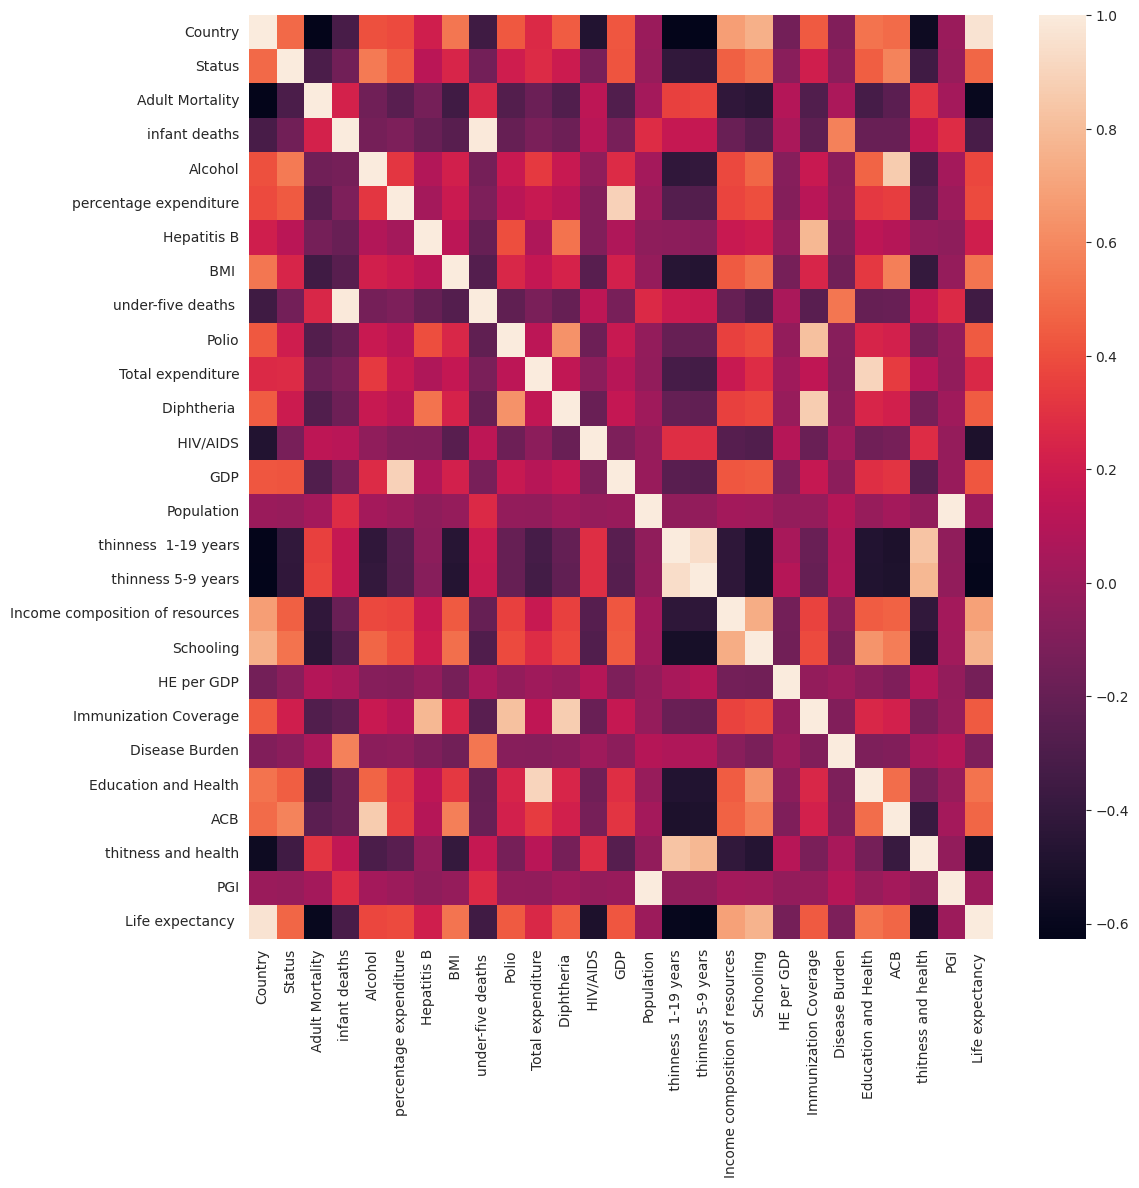

In [61]:
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr,ax=ax)

##Numerical distrbution transformation

array([[<Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>],
       [<Axes: title={'center': 'Total expenditure'}>,
        <Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center': 'Schooling'}>,
        <Axes: title={'center': 'HE 

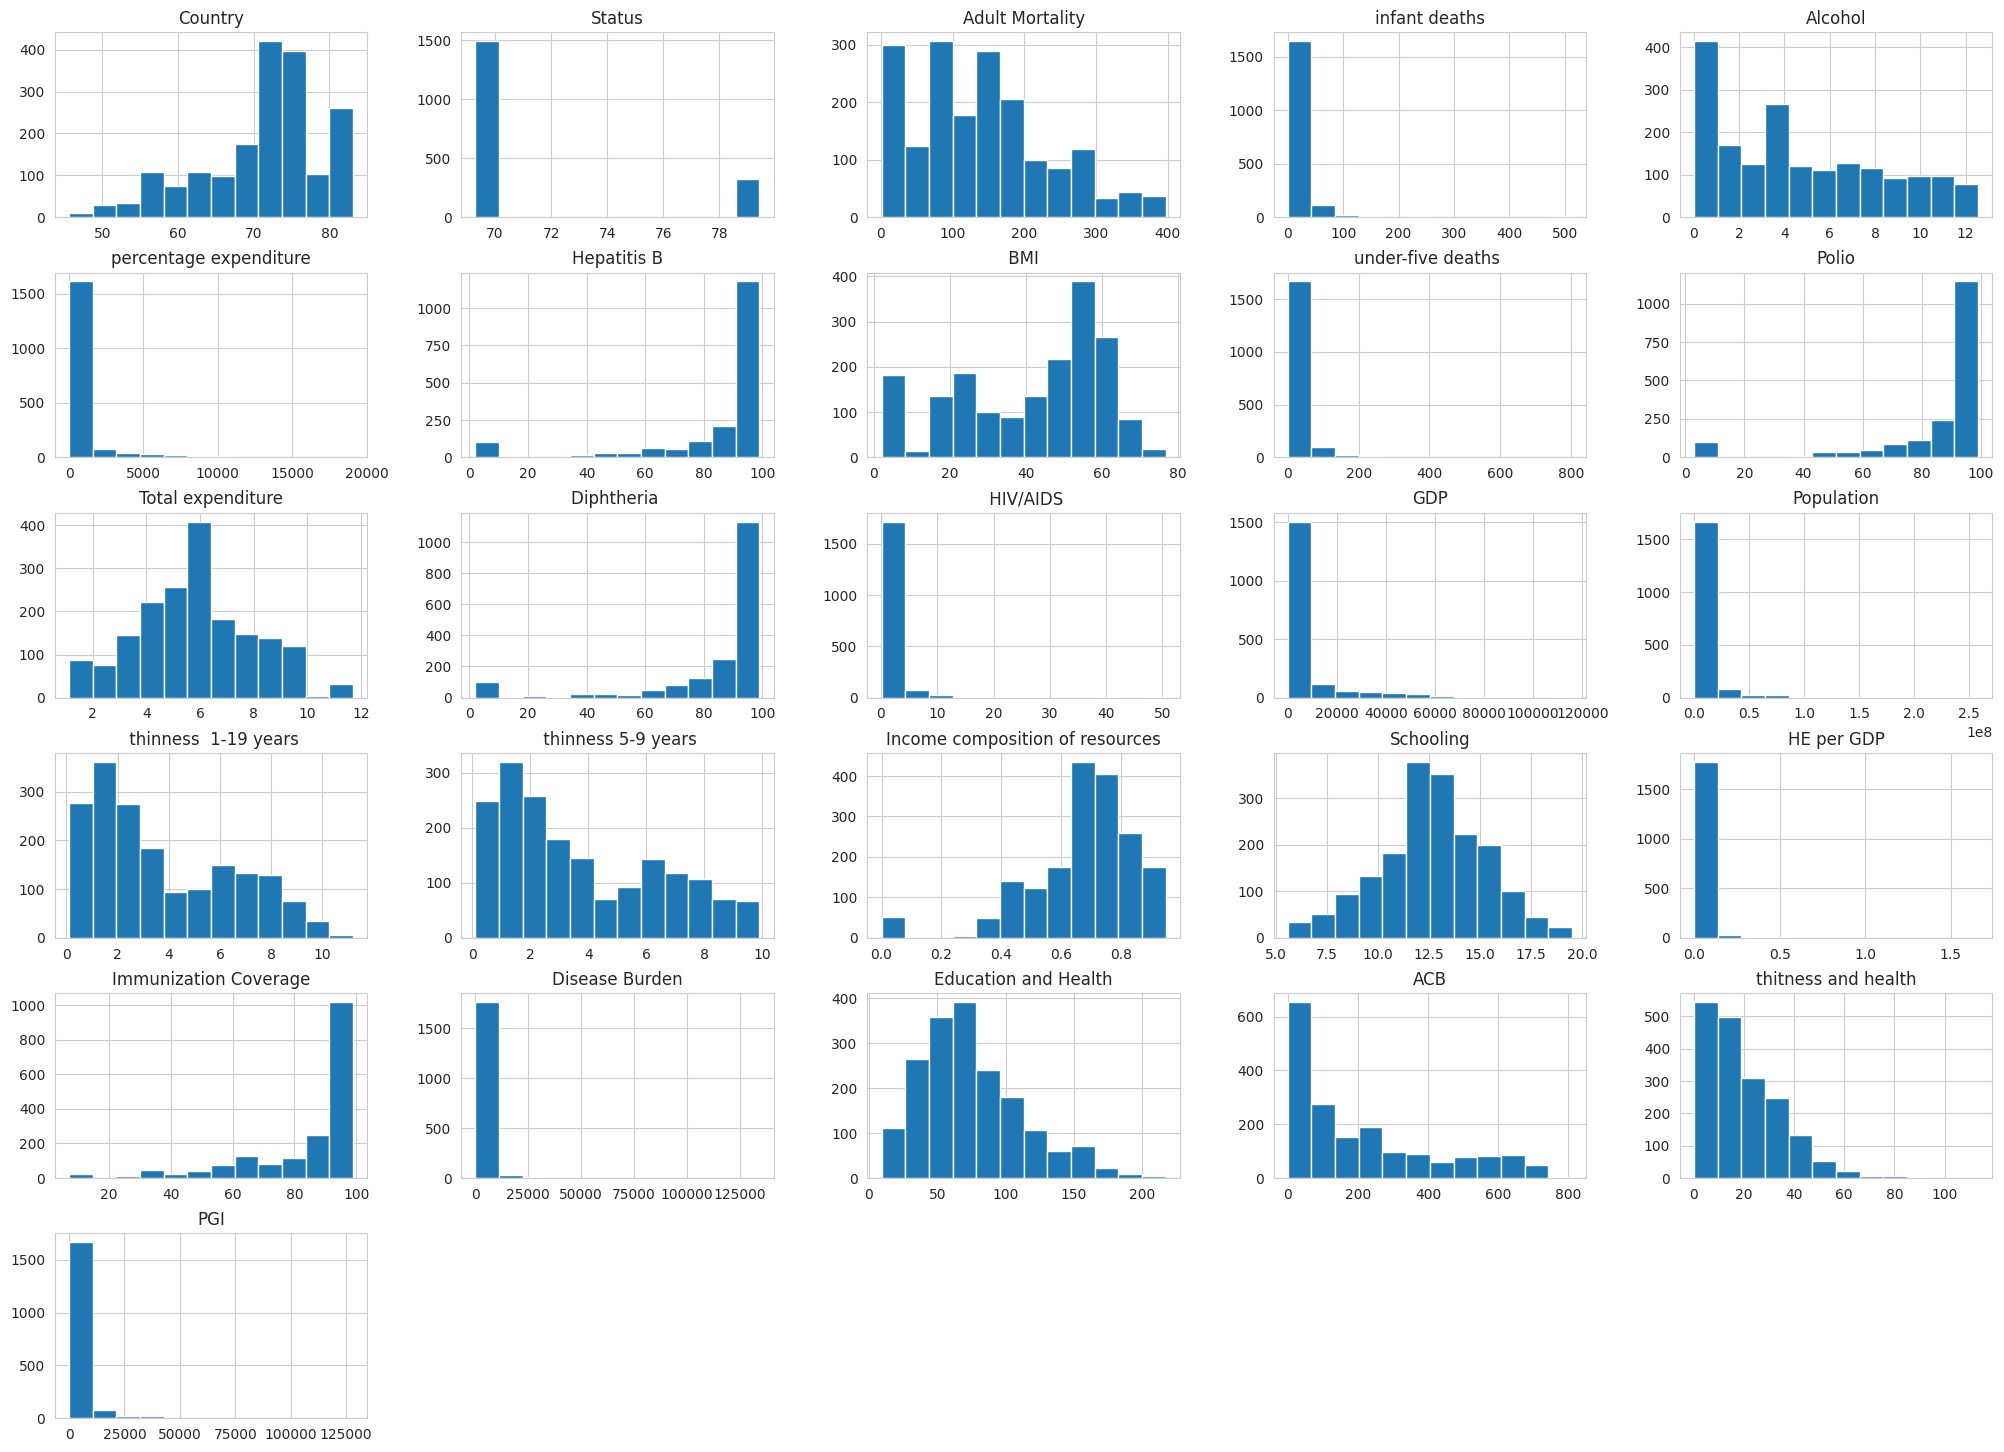

In [62]:
X_train.hist(figsize = (25,18),bins=12)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


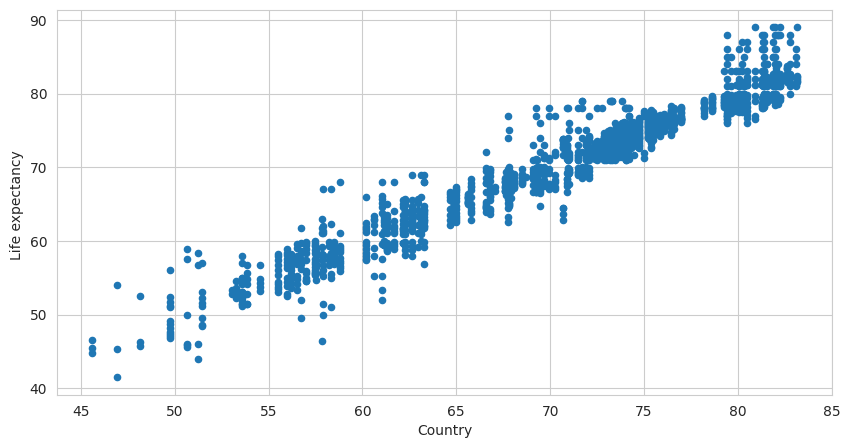

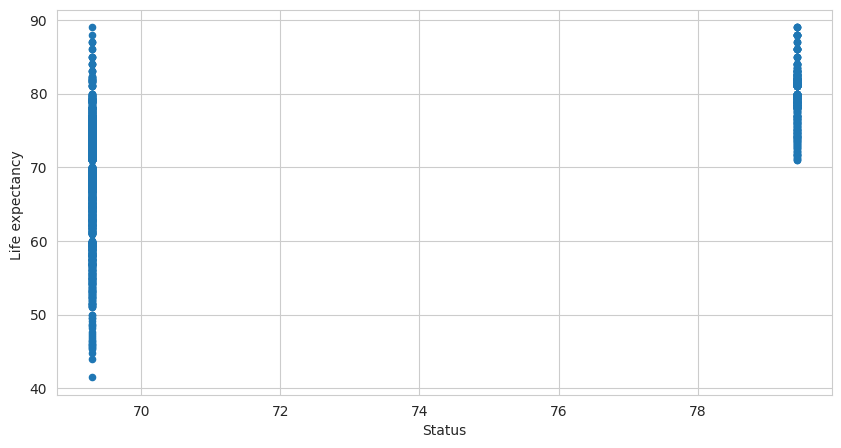

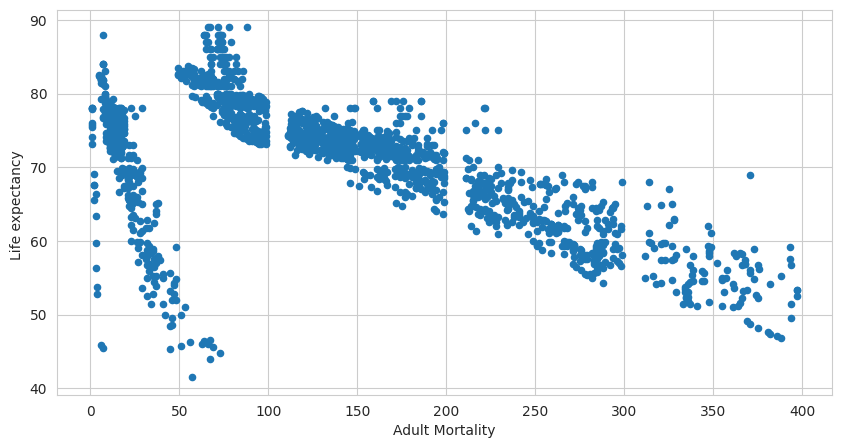

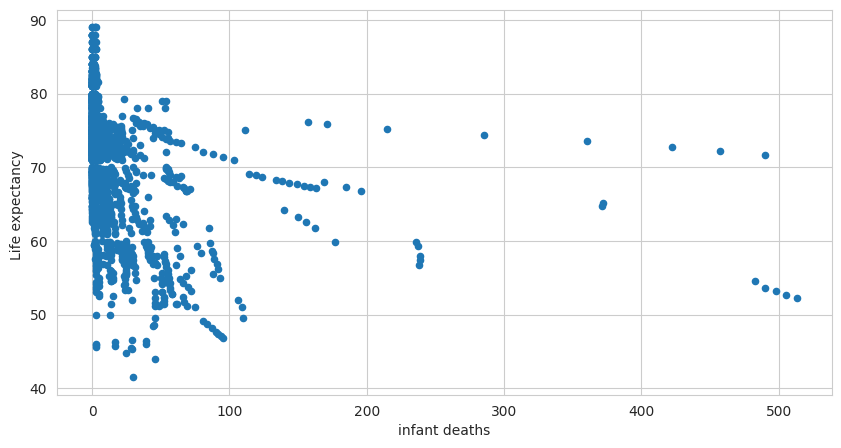

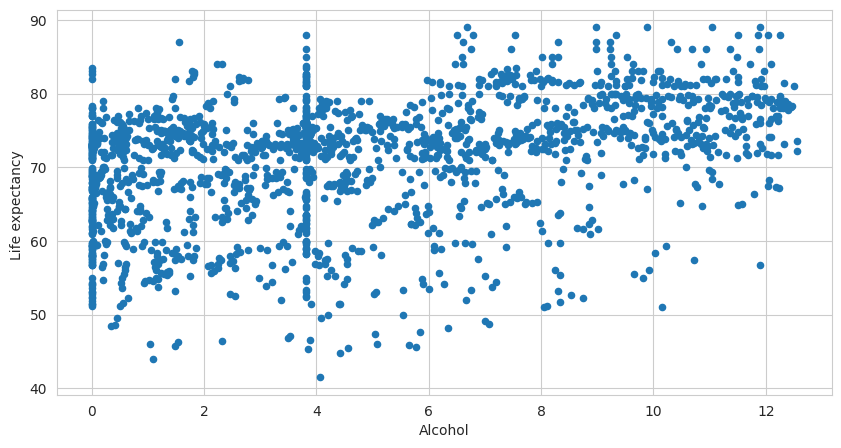

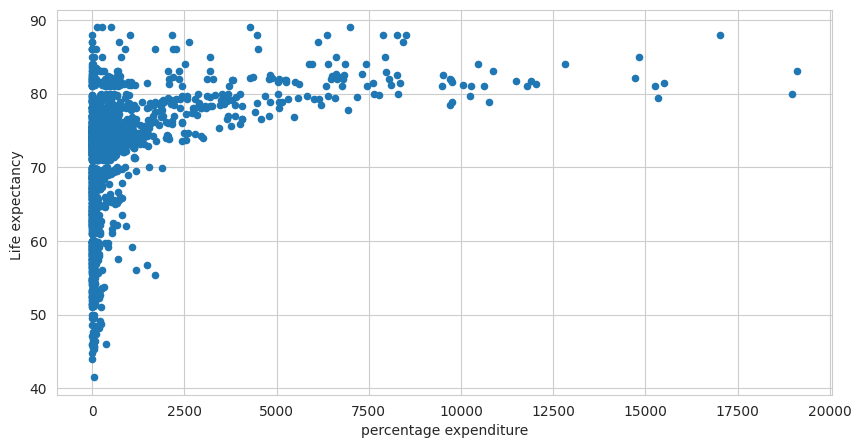

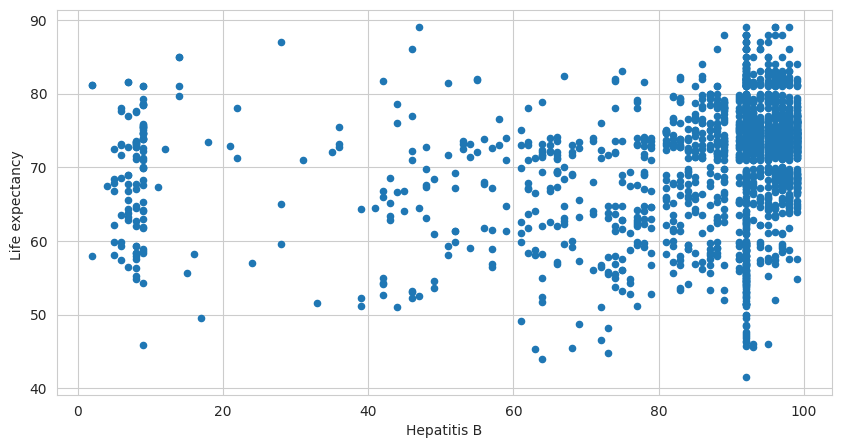

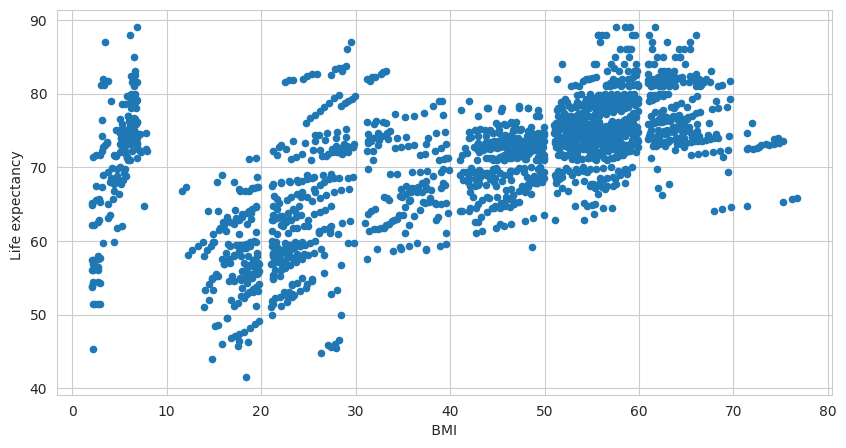

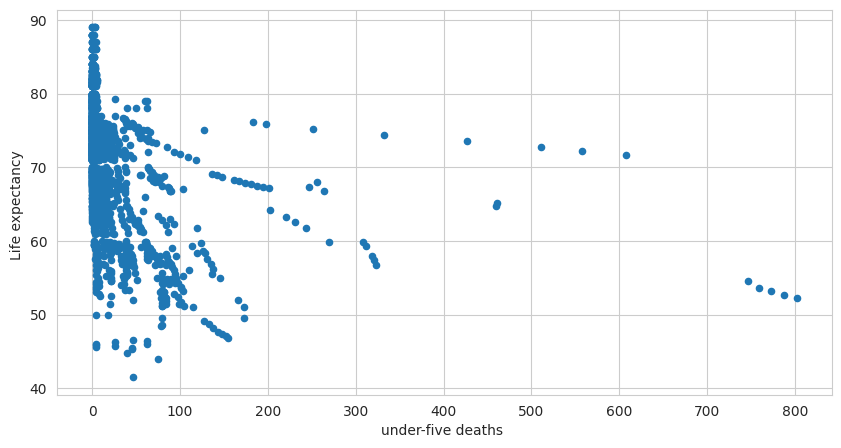

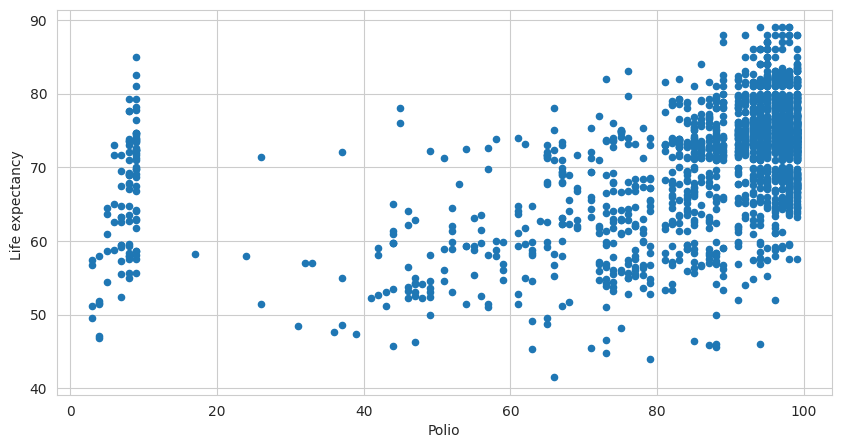

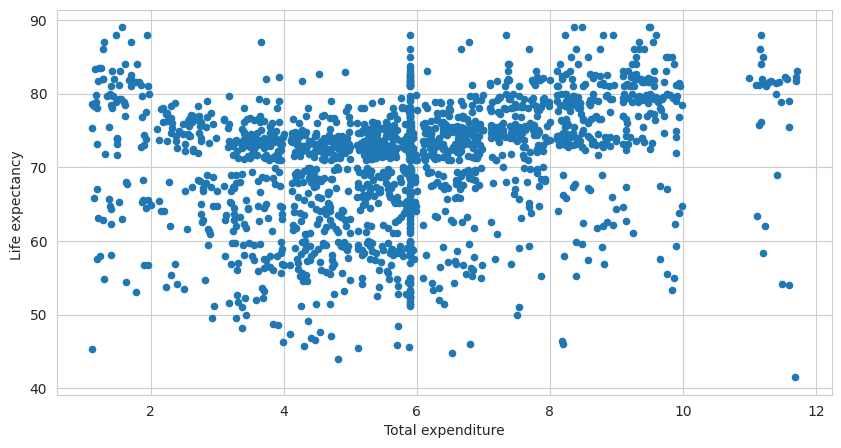

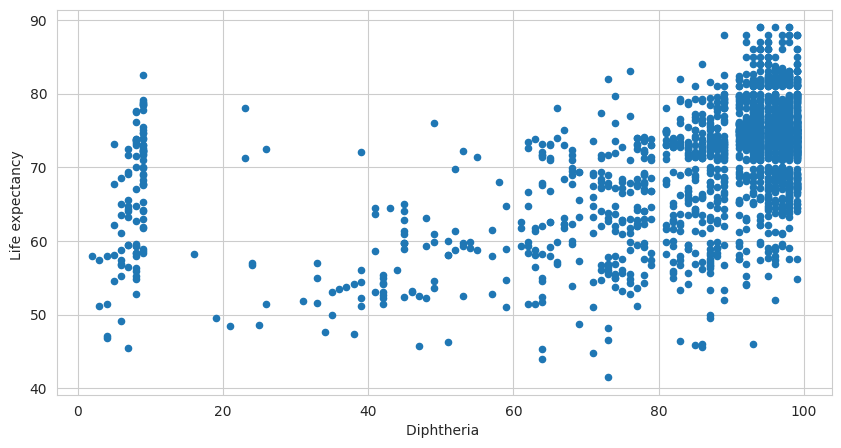

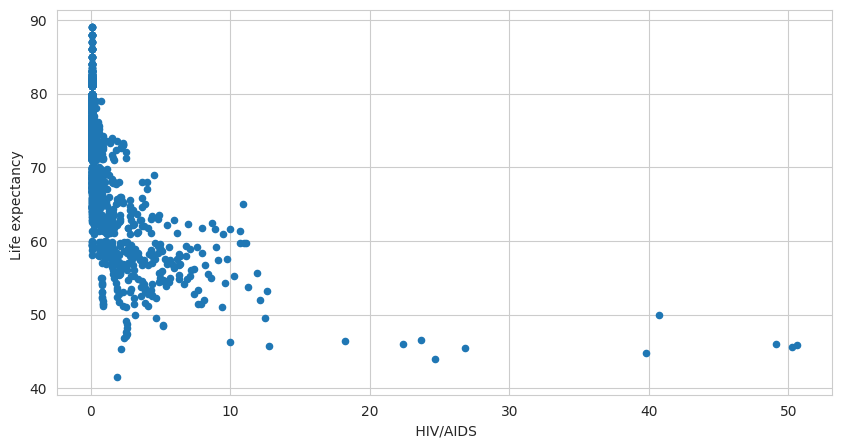

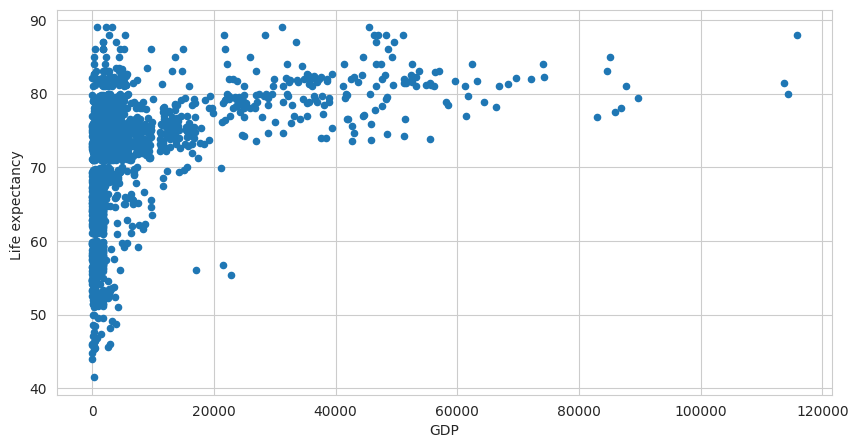

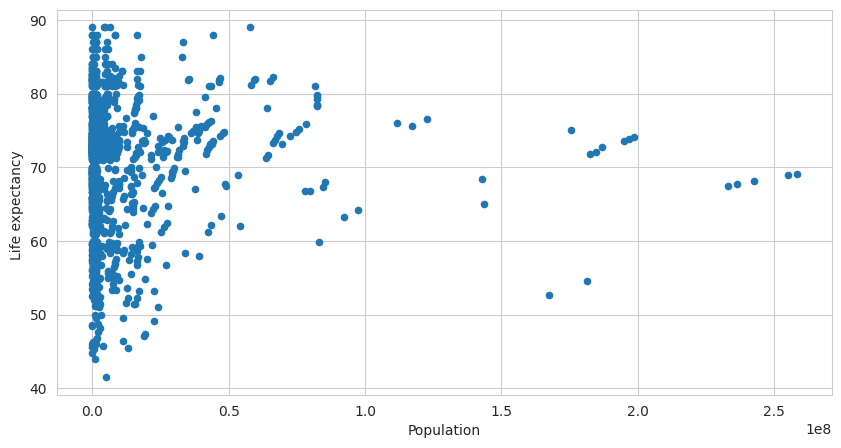

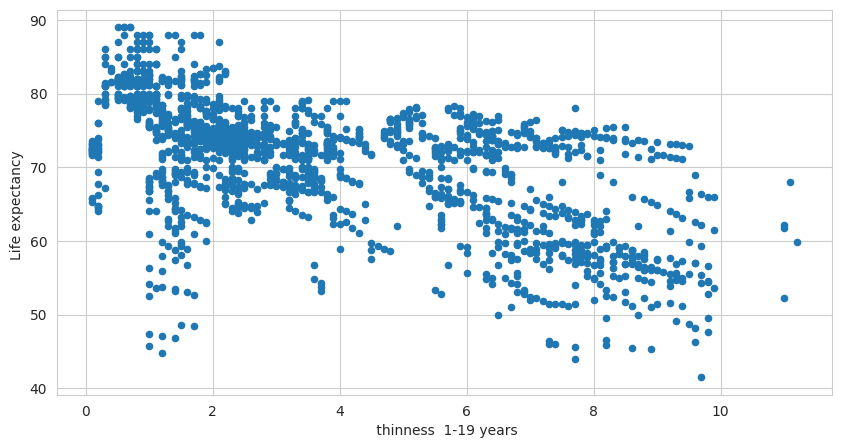

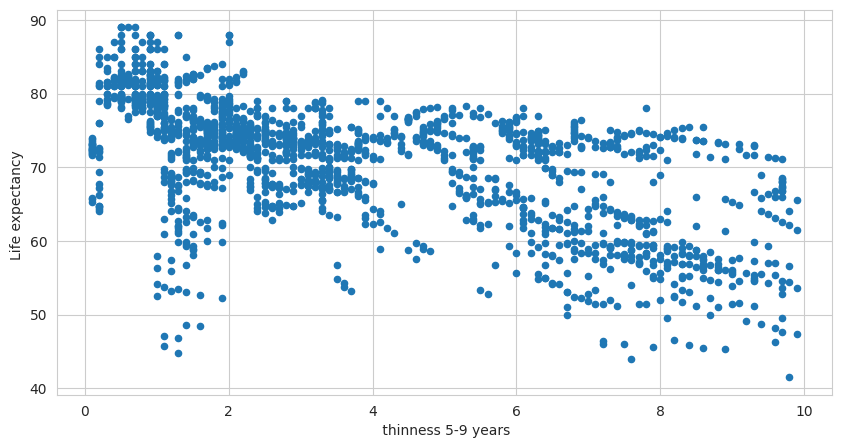

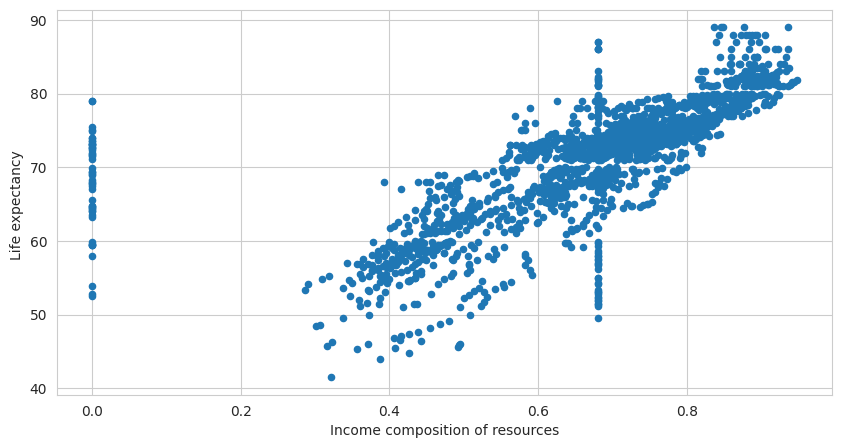

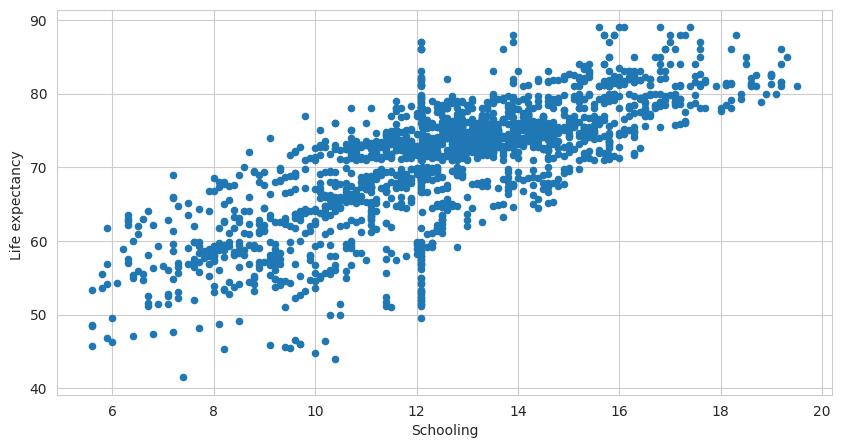

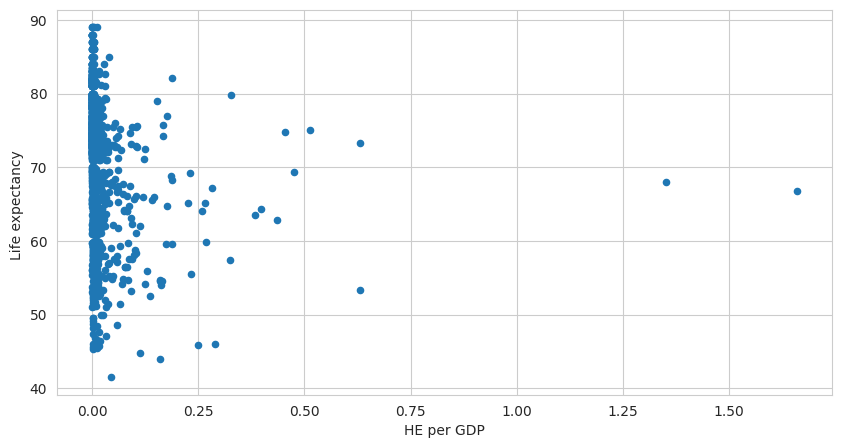

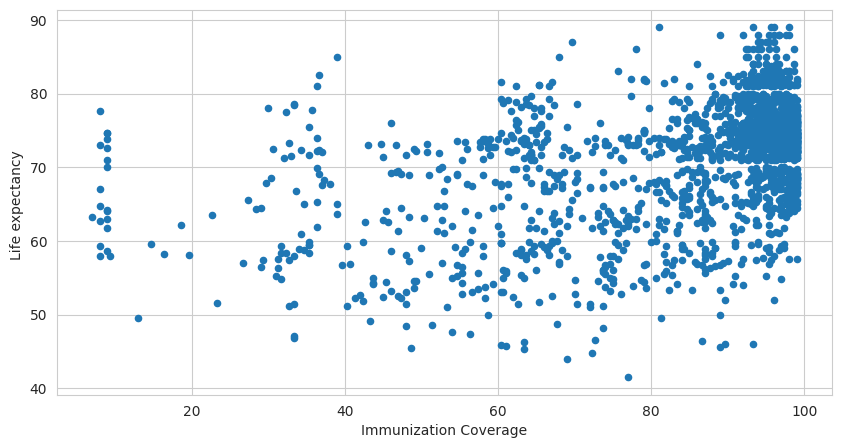

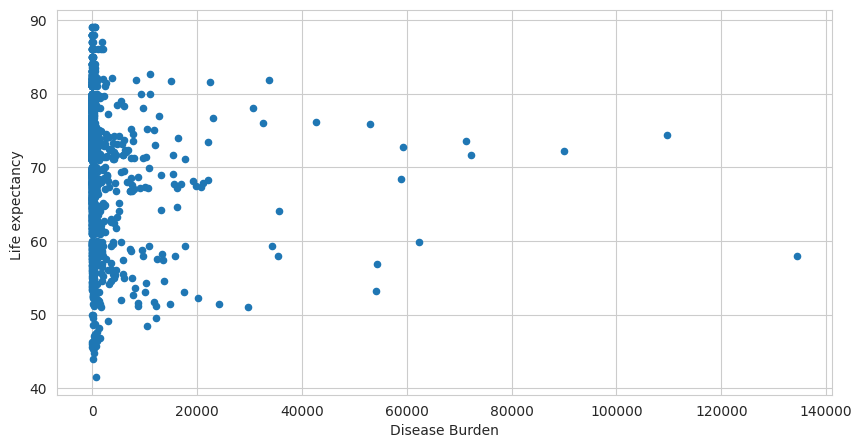

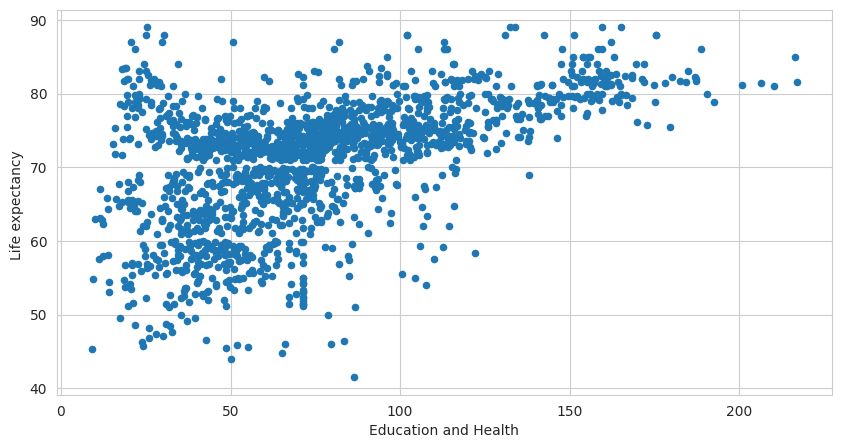

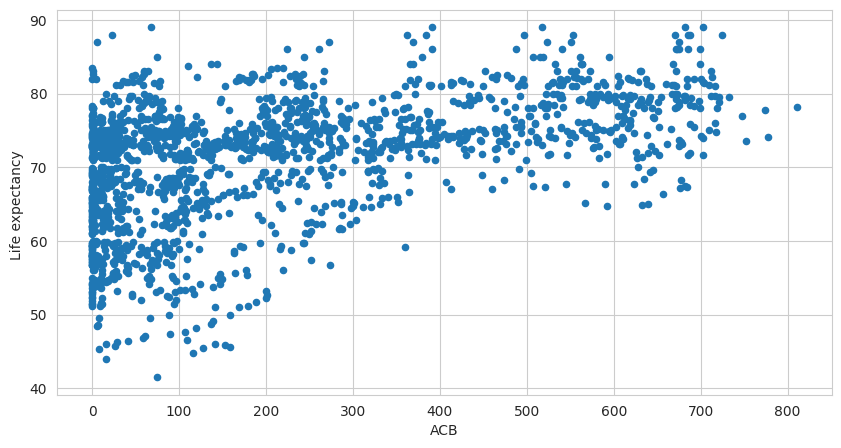

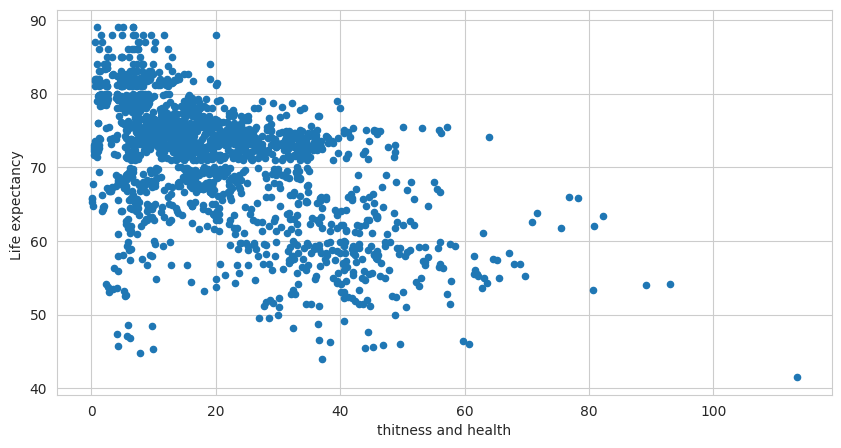

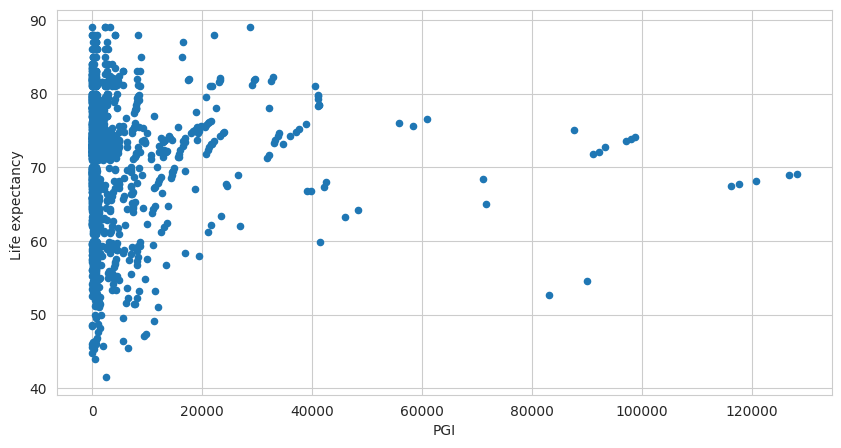

In [63]:
for name in X_train.columns:
    X_train.join(y_train).plot.scatter(x = name,y = 'Life expectancy ',figsize = (10,5))

In [64]:
X_train['Population'] = np.log(X_train['Population'])

In [65]:
X_test['Population'] = np.log(X_test['Population'])

In [66]:
X_train['Education and Health'] = np.log(X_train['Education and Health'])
X_test['Education and Health'] = np.log(X_test['Education and Health'])

In [67]:
from feature_engine.transformation import ReciprocalTransformer

In [68]:
rt = ReciprocalTransformer(variables=['PGI',' HIV/AIDS'])
rt.fit(X_train)

ReciprocalTransformer(variables=['PGI', ' HIV/AIDS'])

In [69]:
X_train = rt.transform(X_train)
X_test = rt.transform(X_test)

In [70]:
from feature_engine.transformation import  YeoJohnsonTransformer

In [71]:
YJ =  YeoJohnsonTransformer(variables=['infant deaths','under-five deaths ','percentage expenditure','GDP',' thinness  1-19 years','ACB','thitness and health','Immunization Coverage','Diphtheria '])
YJ.fit(X_train)

YeoJohnsonTransformer(variables=['infant deaths', 'under-five deaths ',
                                 'percentage expenditure', 'GDP',
                                 ' thinness  1-19 years', 'ACB',
                                 'thitness and health', 'Immunization Coverage',
                                 'Diphtheria '])

In [72]:
X_train = YJ.transform(X_train)
X_test = YJ.transform(X_test)

#Visualizing

array([[<Axes: title={'center': 'Country'}>,
        <Axes: title={'center': 'Status'}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>,
        <Axes: title={'center': 'Alcohol'}>],
       [<Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>],
       [<Axes: title={'center': 'Total expenditure'}>,
        <Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center': 'Schooling'}>,
        <Axes: title={'center': 'HE 

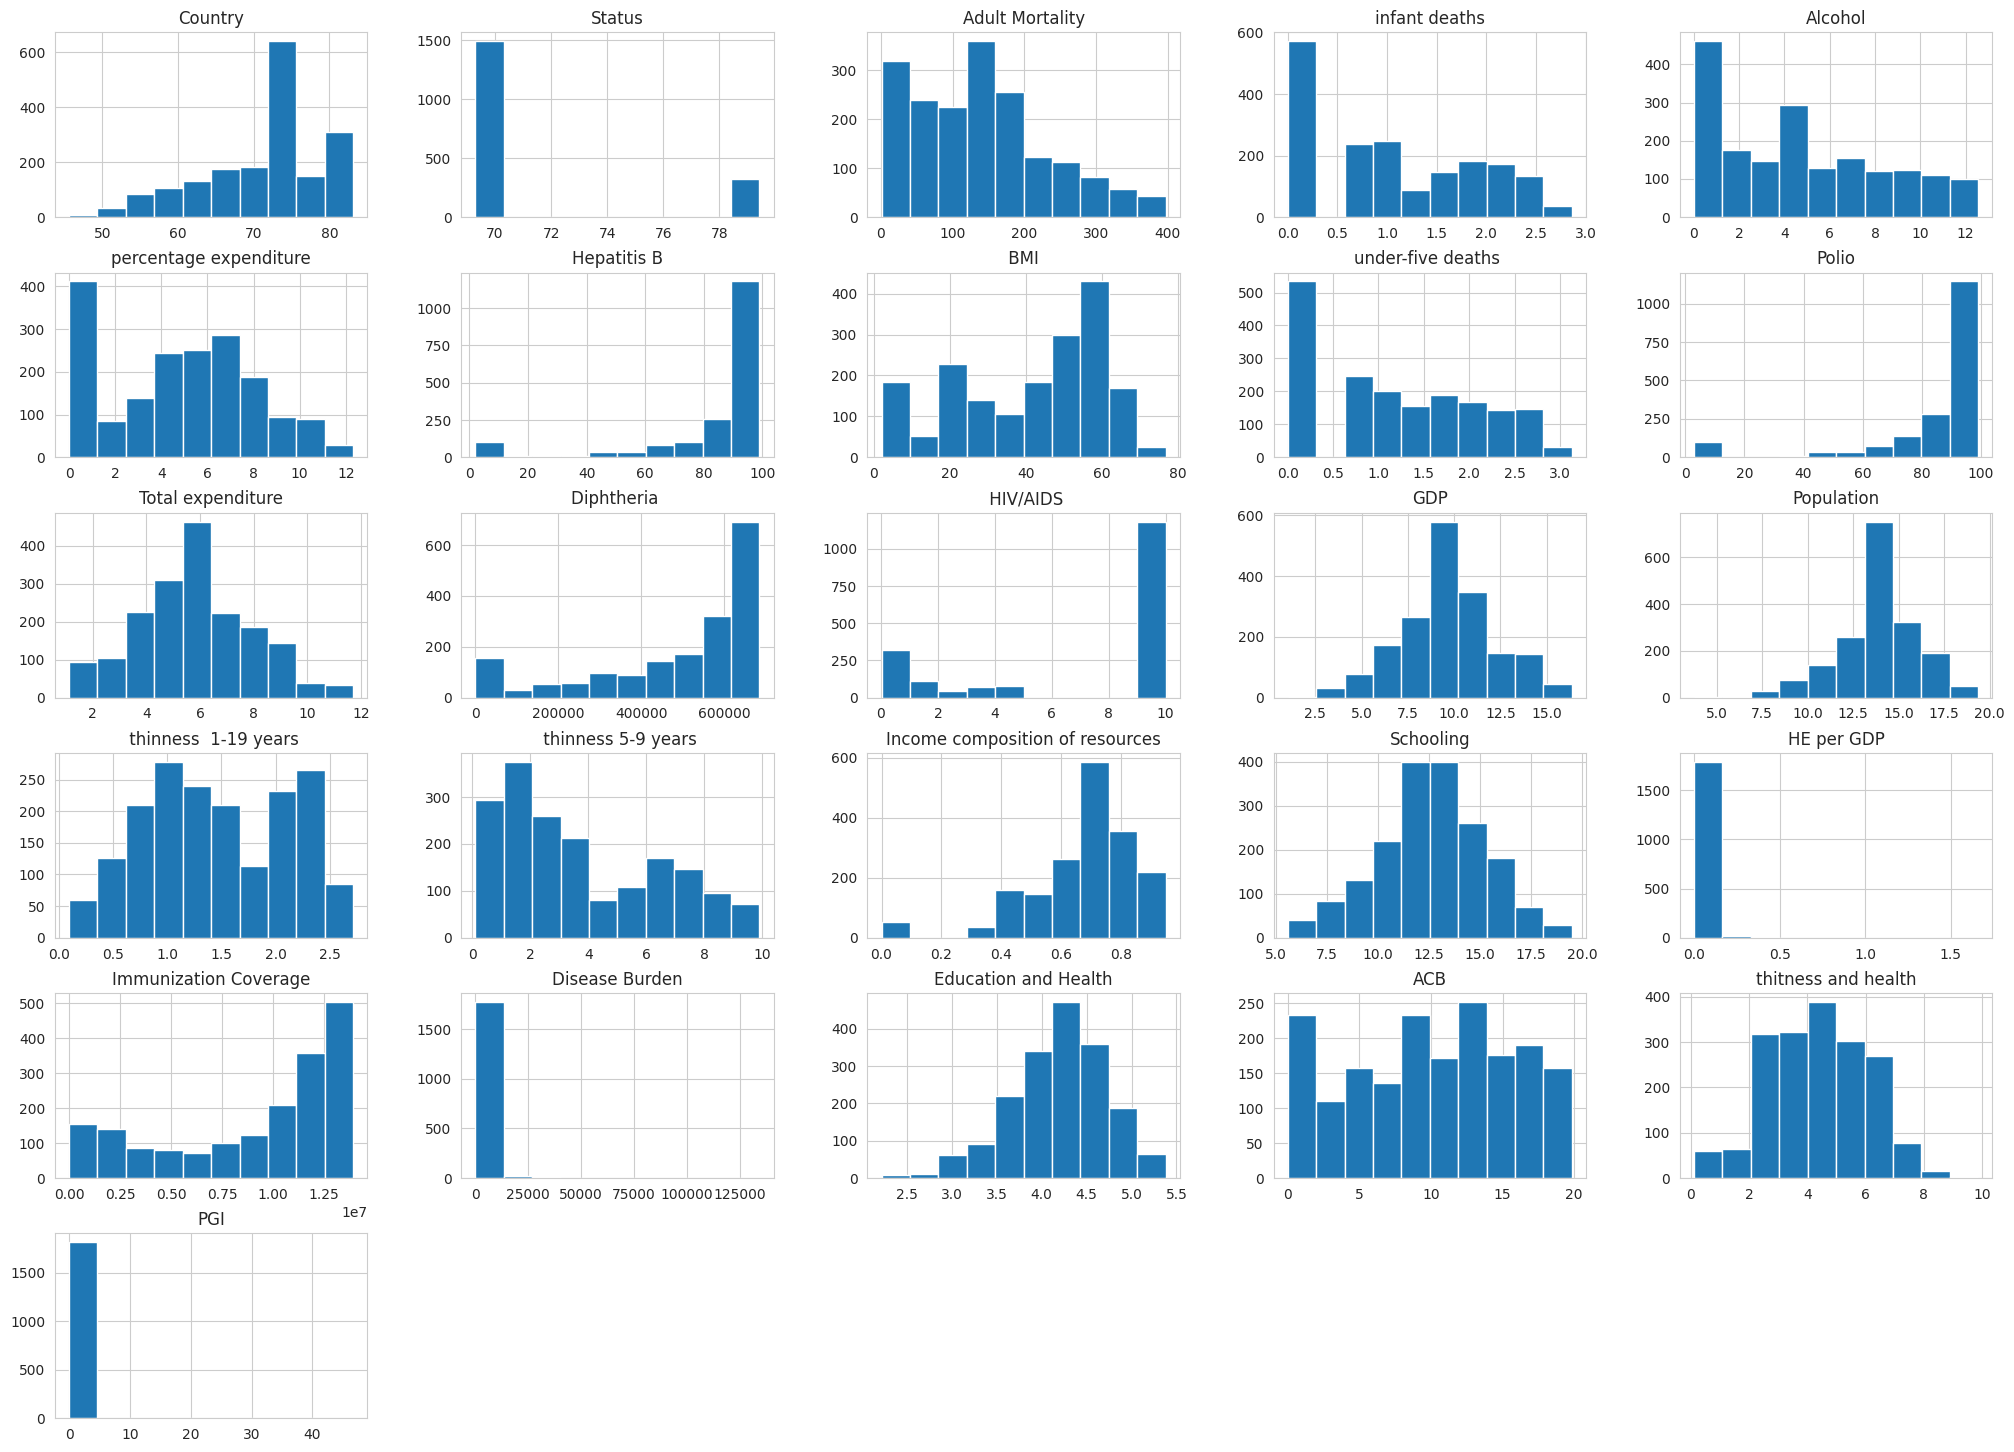

In [73]:
X_train.hist(figsize = (25,18))

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


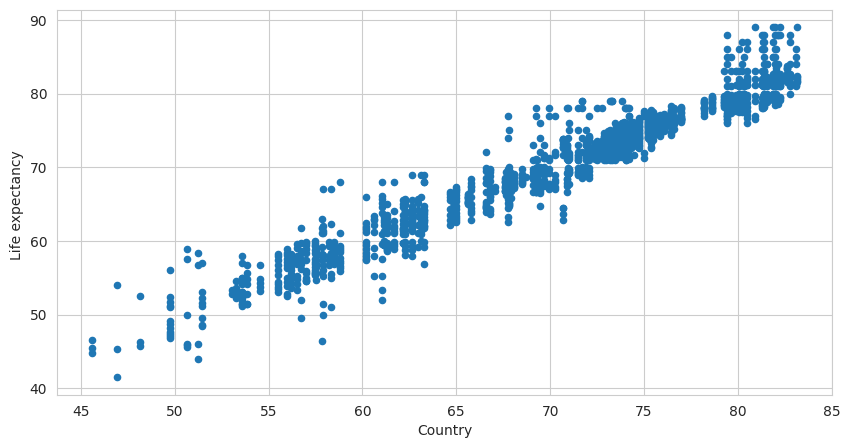

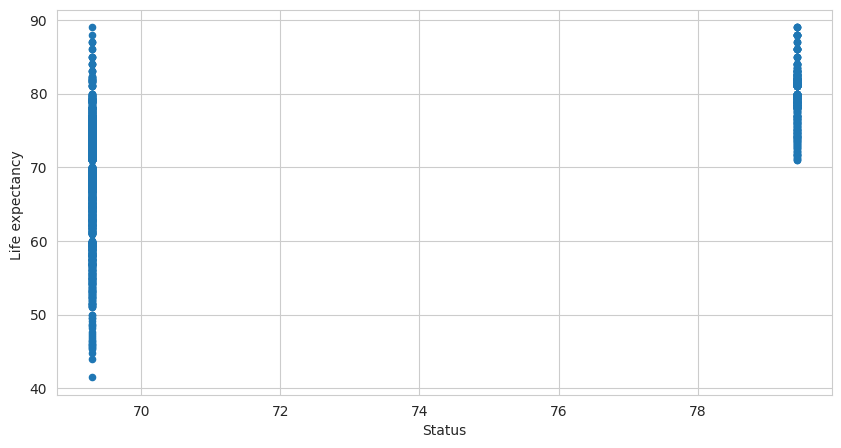

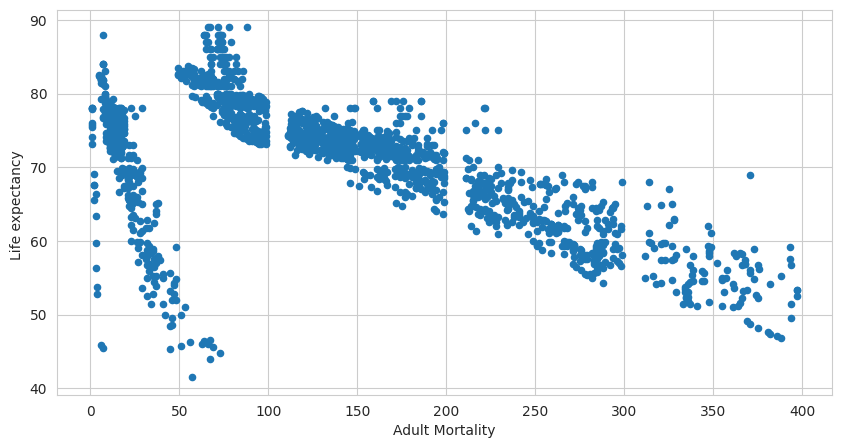

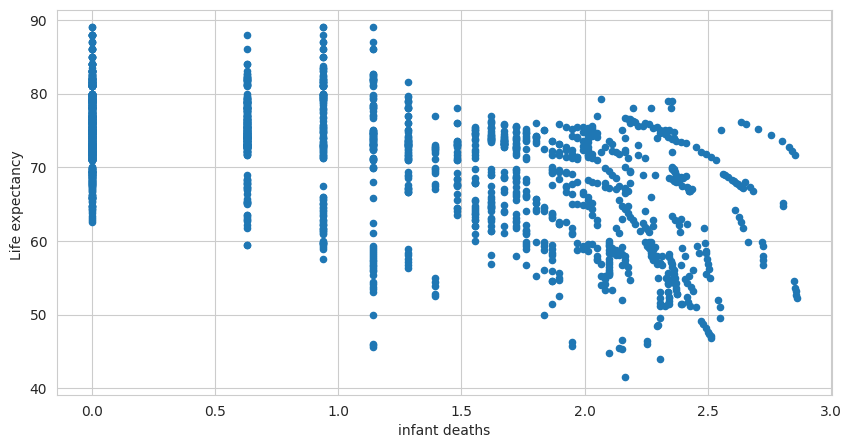

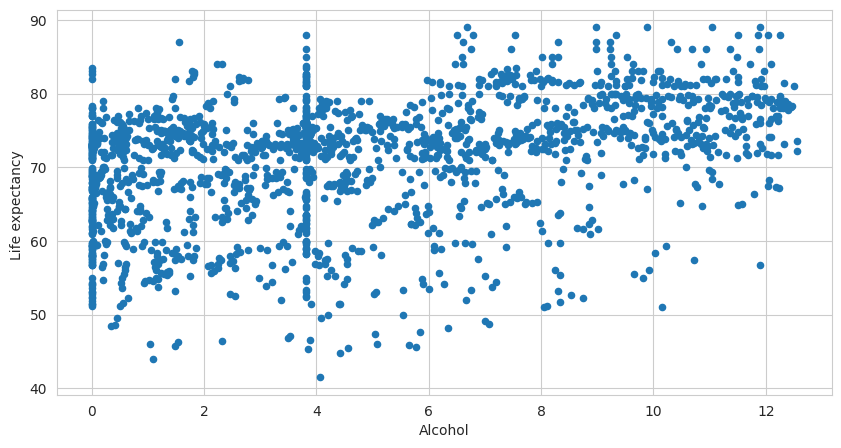

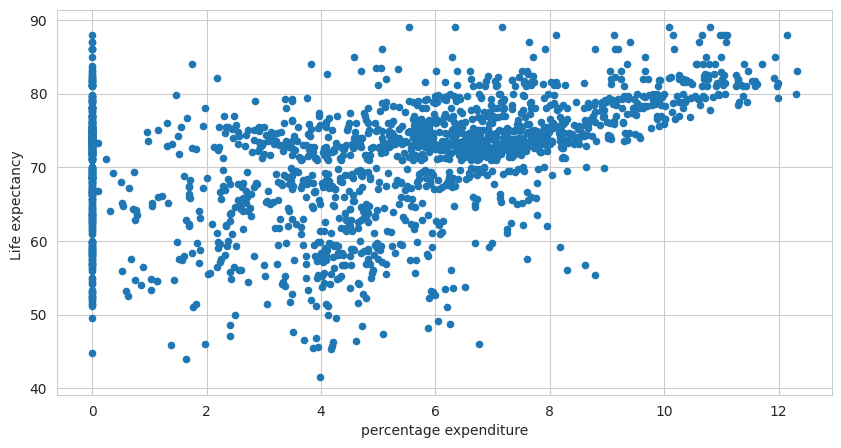

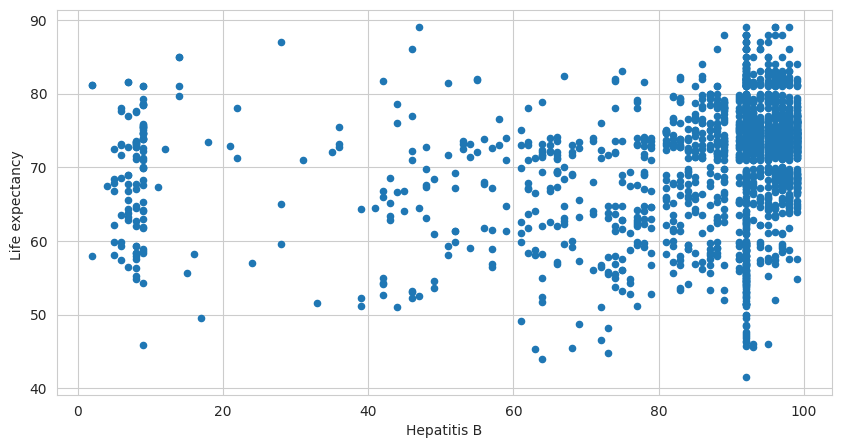

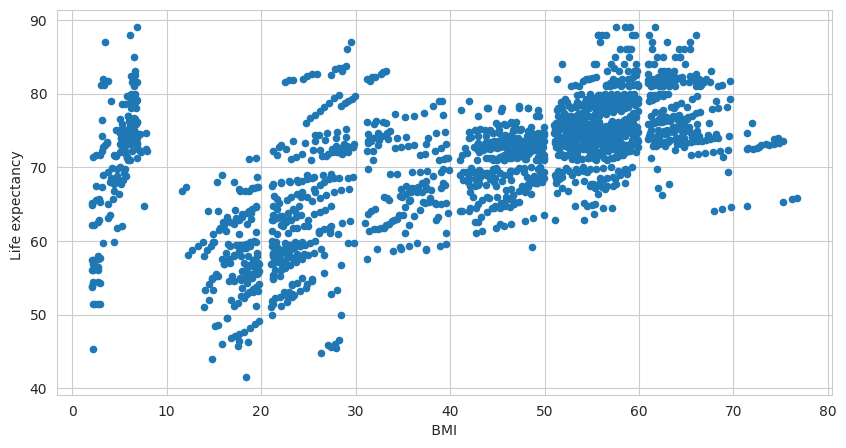

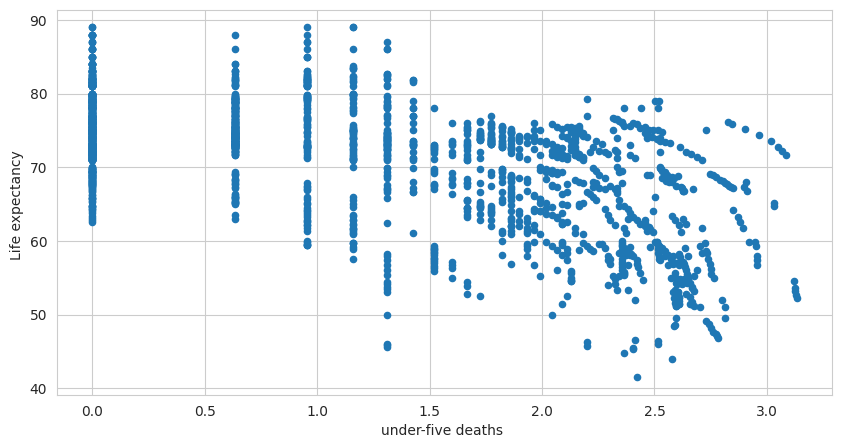

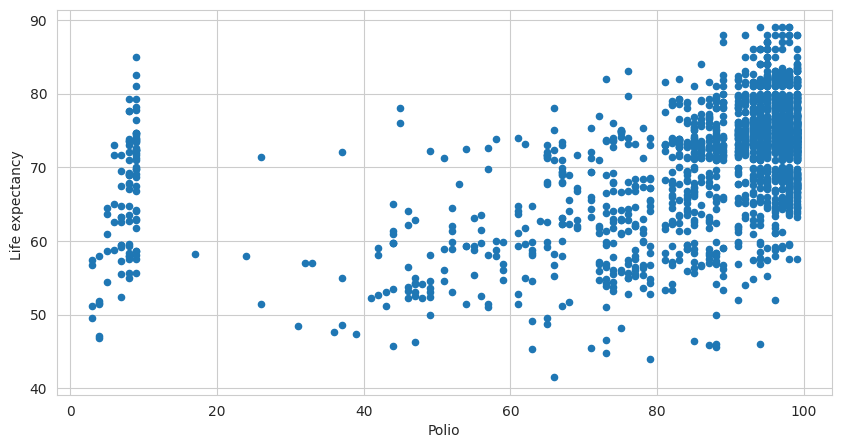

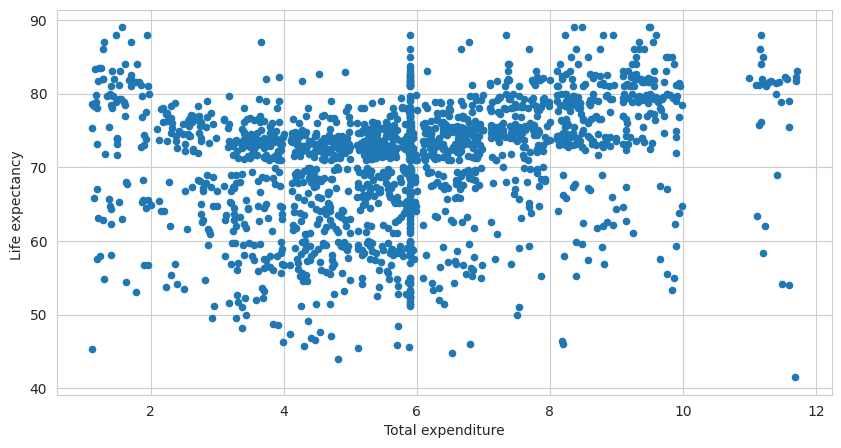

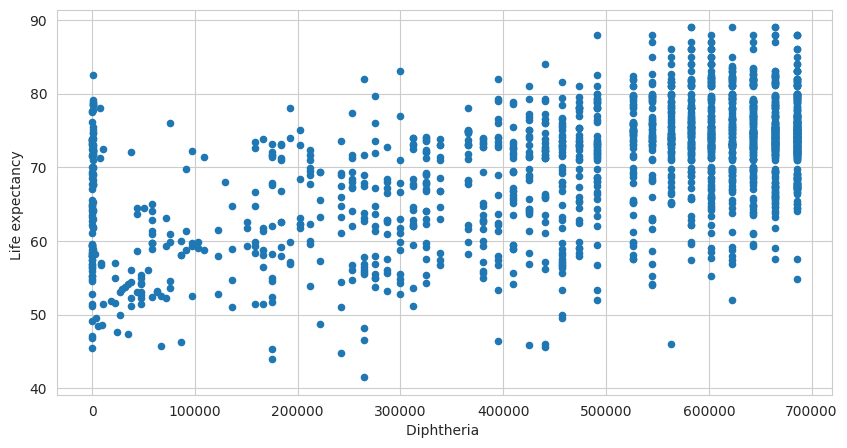

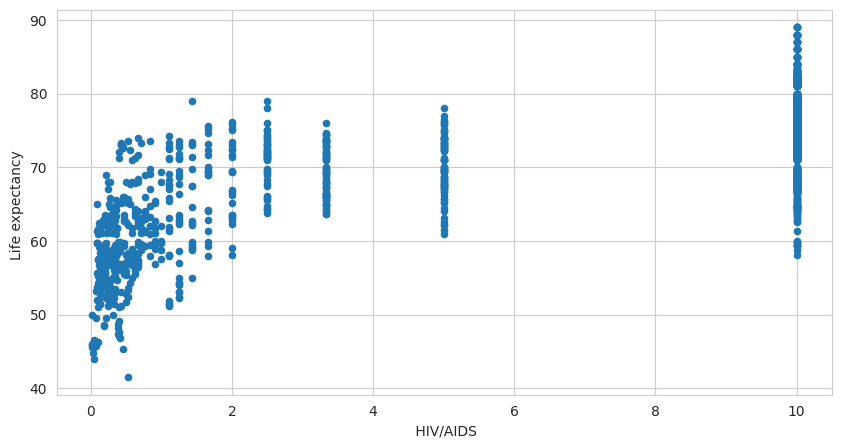

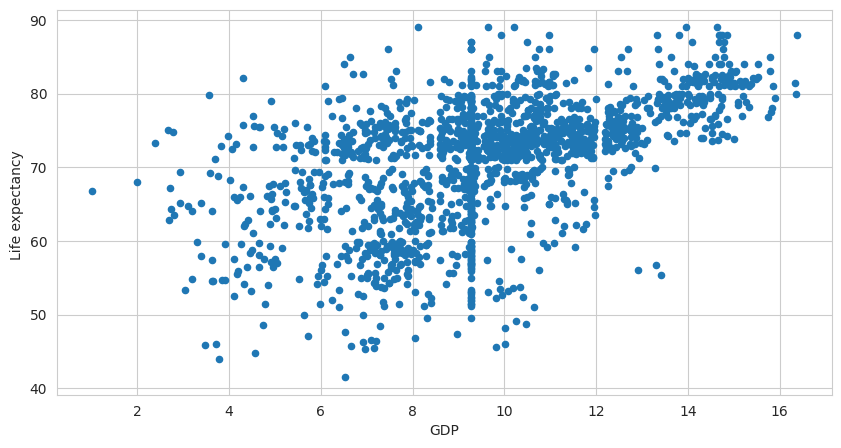

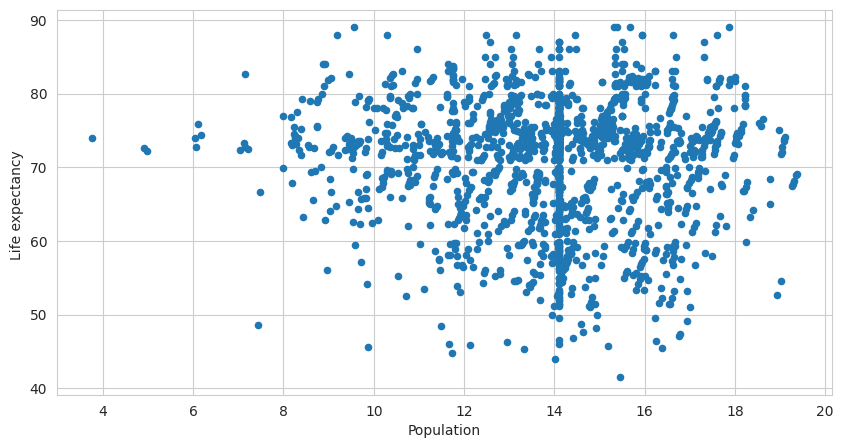

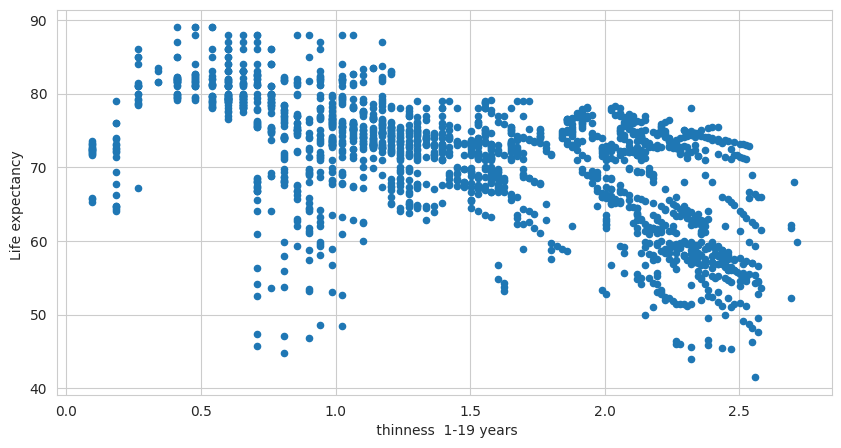

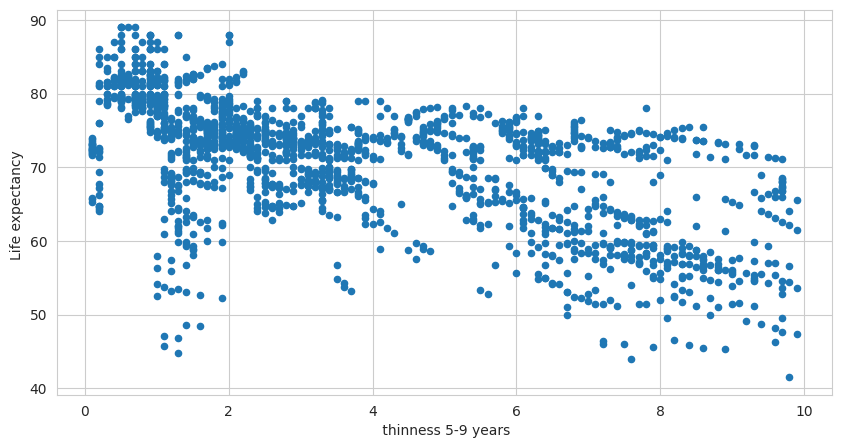

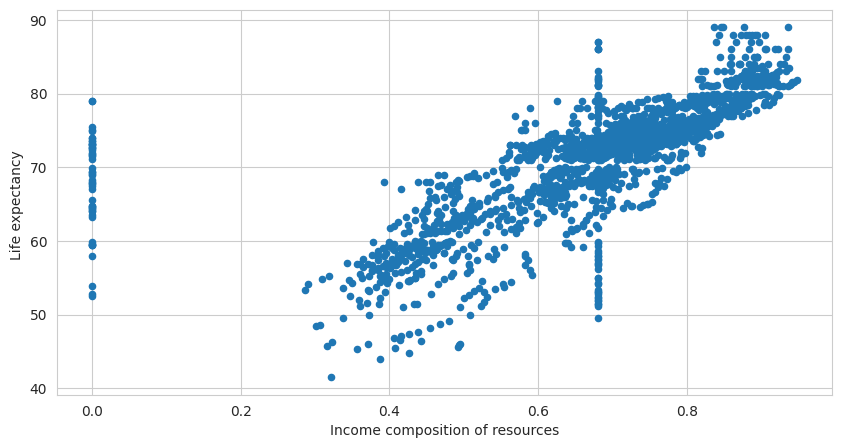

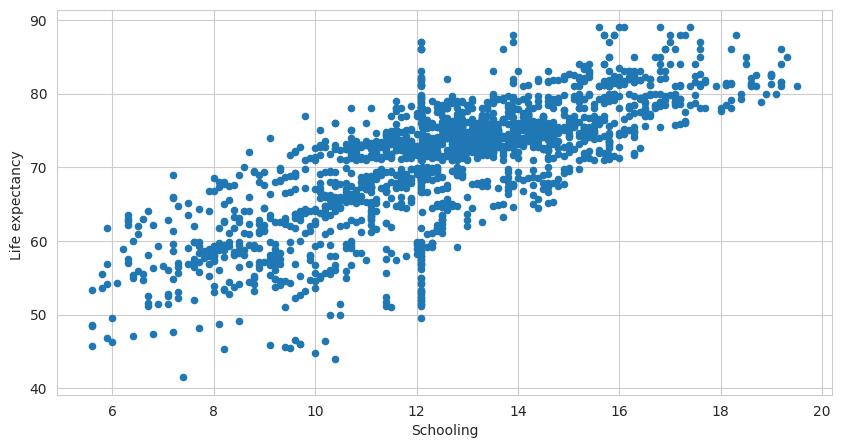

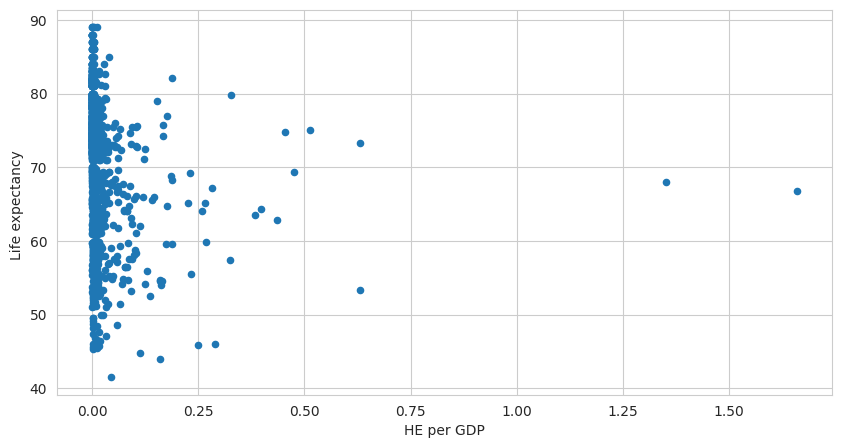

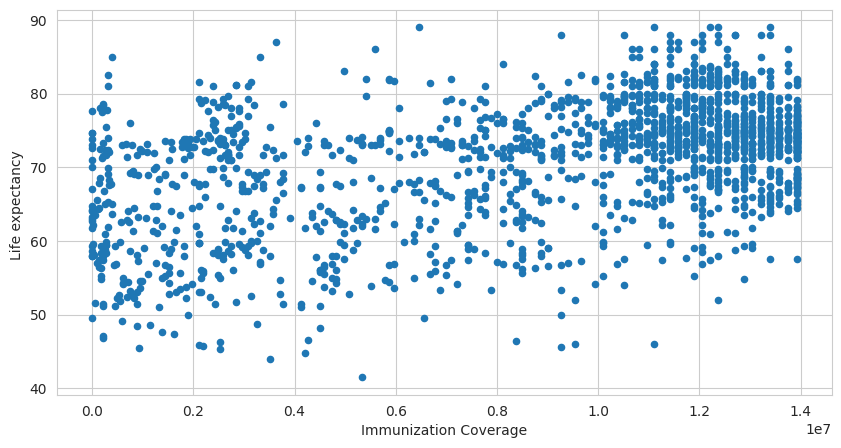

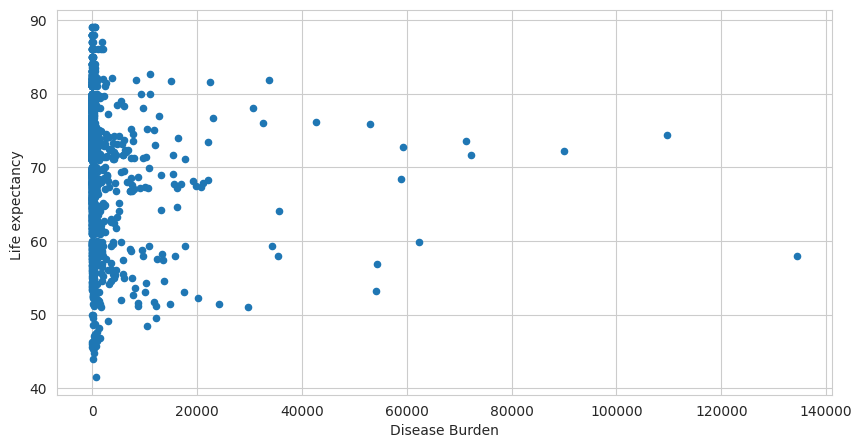

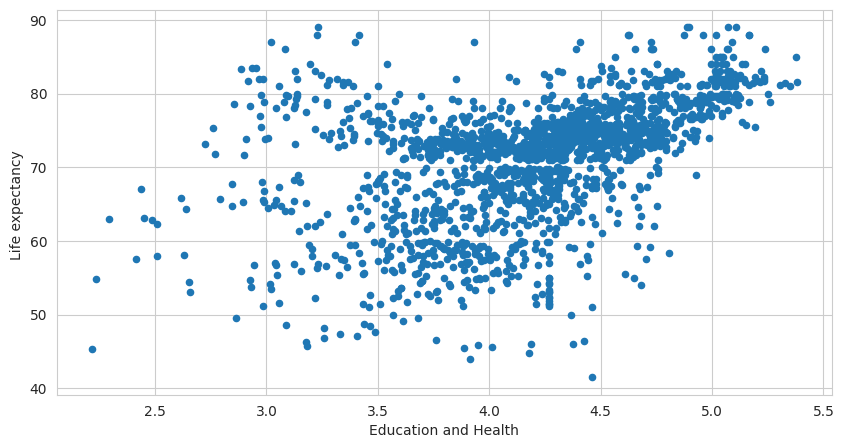

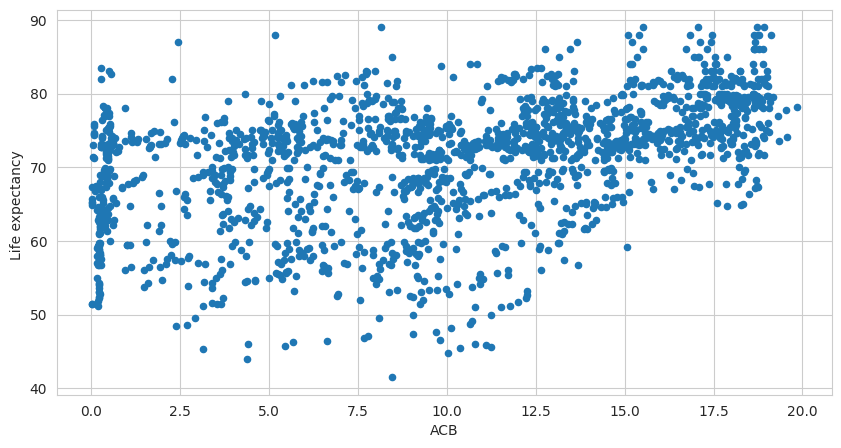

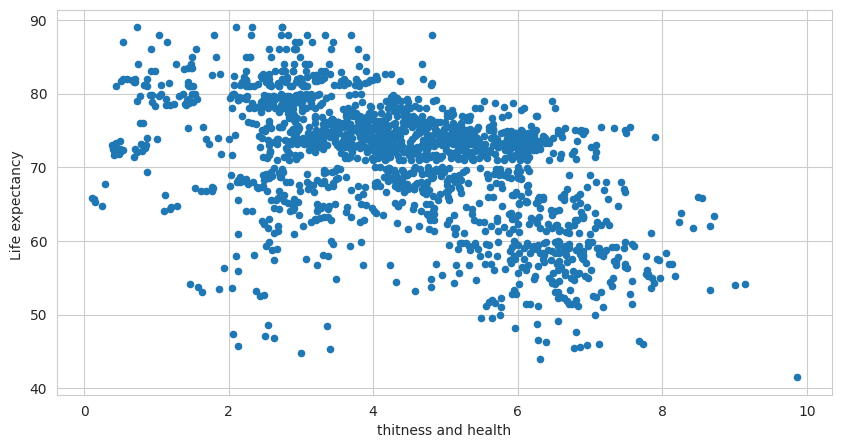

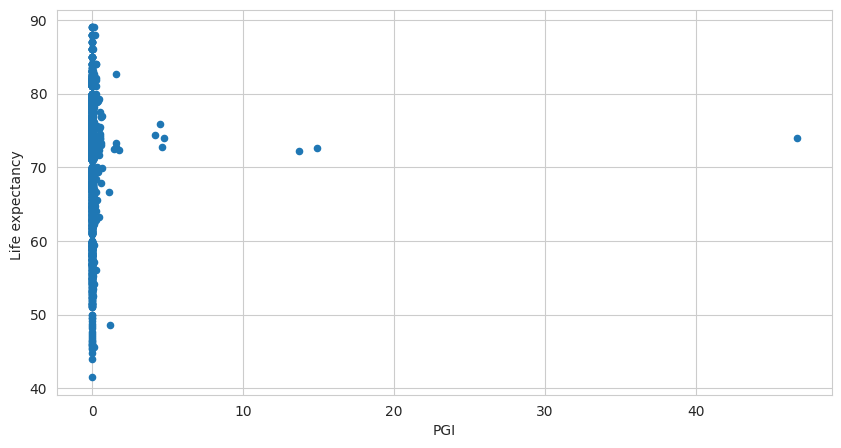

In [74]:
for name in X_train.columns:
    X_train.join(y_train).plot.scatter(x = name,y = 'Life expectancy ',figsize = (10,5))

# Model

In [75]:
y_test.drop(X_test[X_test.isna()['Country'] == True].index,inplace=True)
X_test.dropna(inplace=True)

In [76]:
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, median_absolute_error, mean_poisson_deviance, mean_gamma_deviance
import statsmodels.api as sm
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import KFold

In [77]:
def evaluate_model(true, predicted):
    R2 = r2_score(true, predicted)
    MAE = mean_absolute_error(true, predicted)
    MSE = mean_squared_error(true, predicted)
    RMSE = root_mean_squared_error(true, predicted)
    MEDE = median_absolute_error(true, predicted)
    MPD = mean_poisson_deviance(true, predicted)
    MGD = mean_gamma_deviance(true, predicted)
    return  R2, MAE, MSE, RMSE, MEDE, MPD, MGD

In [78]:
def Kfold_performance(X_train, y_train, model, scorer:dict, n_split = 7):
  kfold = KFold(n_splits=n_split).split(X_train, y_train)
  for k, (train, test) in enumerate(kfold):
   model.fit(X_train.iloc[train], y_train.iloc[train])
   yptr = model.predict(X_train.iloc[train])
   ypte = model.predict(X_train.iloc[test])
   print(f'Fold: {k+1:02d} \n')
   for key,sc in scorer.items():
     score_test = eval(sc+'(y_train.iloc[test], ypte)')
     score_train = eval(sc+'(y_train.iloc[train] , yptr)')
     print(f'{key}:'
     f'{key}.train: {score_train:.3f},'
     f'{key}.test: {score_test:.3f}')

In [79]:
X_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
models = {
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVM": SVR(),
}
scorer = {
    "R2" : "r2_score",
    "MAE" : "mean_absolute_error",
    "MSE" : "mean_squared_error",
    "RMSE" : "root_mean_squared_error",
    "MEDE" : "median_absolute_error",
    "MPD" : "mean_poisson_deviance",
    "MGD" : "mean_gamma_deviance"
}

In [80]:
for model_name, model in models.items():
    print(f"\n{model_name} :\n")
    Kfold_performance(X_train, y_train, model, scorer, 5)


Lasso :

Fold: 01 

R2:R2.train: 0.936,R2.test: 0.927
MAE:MAE.train: 1.447,MAE.test: 1.498
MSE:MSE.train: 4.298,MSE.test: 4.864
RMSE:RMSE.train: 2.073,RMSE.test: 2.205
MEDE:MEDE.train: 1.036,MEDE.test: 0.976
MPD:MPD.train: 0.064,MPD.test: 0.071
MGD:MGD.train: 0.001,MGD.test: 0.001
Fold: 02 

R2:R2.train: 0.933,R2.test: 0.940
MAE:MAE.train: 1.470,MAE.test: 1.417
MSE:MSE.train: 4.520,MSE.test: 3.814
RMSE:RMSE.train: 2.126,RMSE.test: 1.953
MEDE:MEDE.train: 1.002,MEDE.test: 1.032
MPD:MPD.train: 0.067,MPD.test: 0.056
MGD:MGD.train: 0.001,MGD.test: 0.001
Fold: 03 

R2:R2.train: 0.933,R2.test: 0.942
MAE:MAE.train: 1.454,MAE.test: 1.442
MSE:MSE.train: 4.393,MSE.test: 4.343
RMSE:RMSE.train: 2.096,RMSE.test: 2.084
MEDE:MEDE.train: 1.017,MEDE.test: 1.020
MPD:MPD.train: 0.064,MPD.test: 0.066
MGD:MGD.train: 0.001,MGD.test: 0.001
Fold: 04 

R2:R2.train: 0.933,R2.test: 0.941
MAE:MAE.train: 1.471,MAE.test: 1.408
MSE:MSE.train: 4.486,MSE.test: 3.989
RMSE:RMSE.train: 2.118,RMSE.test: 1.997
MEDE:MEDE.tr

In [81]:
# As you can see, XGBregressor has the best performance
#Parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,randint

In [82]:
param_dist = {
    'n_estimators': randint(50, 500), # Number of trees, typically between 50 and 500
    'learning_rate': uniform(0.01, 0.5), # Learning rate, typically between 0.01 and 0.5
    'max_depth': randint(3, 12), # Maximum depth of a tree, typically between 3 and 12
    'min_child_weight': randint(1, 10), # Minimum sum of instance weight (hessian) needed in a child
    'gamma': uniform(0, 0.5), # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'subsample': uniform(0.6, 0.4), # Subsample ratio of the training instances, typically between 0.6 and 1.0
    'colsample_bytree': uniform(0.6, 0.4), # Subsample ratio of columns when constructing each tree, typically between 0.6 and 1.0
    'colsample_bylevel': uniform(0.6, 0.4), # Subsample ratio of columns for each split, in each level
    'reg_alpha': uniform(0, 1), # L1 regularization term on weights
    'reg_lambda': uniform(0, 1), # L2 regularization term on weights
}

In [83]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Initialize the regressor
xgb = XGBRegressor()

# Initialize the randomized search
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=100, scoring='r2', cv=5, random_state=42, n_jobs=-1)

# Fit the randomized search
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae9395834f0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ae93958c1f0>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ae93958e3e0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ae93958d150>},
                   random_state=42, scoring='r2')

In [84]:
random_search.best_params_

{'colsample_bylevel': 0.7924351793550344,
 'colsample_bytree': 0.7988047795284996,
 'gamma': 0.3826781405331203,
 'learning_rate': 0.06149073966565776,
 'max_depth': 10,
 'min_child_weight': 7,
 'n_estimators': 408,
 'reg_alpha': 0.7532462207474508,
 'reg_lambda': 0.27230185472029944,
 'subsample': 0.9589721639275537}

In [87]:
model = XGBRegressor(colsample_bylevel= 0.7924351793550344,
 colsample_bytree= 0.7988047795284996,
 gamma= 0.3826781405331203,
 learning_rate= 0.06149073966565776,
 max_depth= 10,
 min_child_weight= 7,
 n_estimators= 408,
 reg_alpha= 0.7532462207474508,
 reg_lambda= 0.27230185472029944,
 subsample= 0.9589721639275537
)

In [90]:
Kfold_performance(X_train, y_train, model, scorer, 5)

Fold: 01 

R2:R2.train: 0.998,R2.test: 0.950
MAE:MAE.train: 0.251,MAE.test: 1.029
MSE:MSE.train: 0.153,MSE.test: 3.355
RMSE:RMSE.train: 0.392,RMSE.test: 1.832
MEDE:MEDE.train: 0.160,MEDE.test: 0.413
MPD:MPD.train: 0.002,MPD.test: 0.049
MGD:MGD.train: 0.000,MGD.test: 0.001
Fold: 02 

R2:R2.train: 0.998,R2.test: 0.967
MAE:MAE.train: 0.254,MAE.test: 0.884
MSE:MSE.train: 0.161,MSE.test: 2.060
RMSE:RMSE.train: 0.402,RMSE.test: 1.435
MEDE:MEDE.train: 0.158,MEDE.test: 0.496
MPD:MPD.train: 0.002,MPD.test: 0.030
MGD:MGD.train: 0.000,MGD.test: 0.000
Fold: 03 

R2:R2.train: 0.998,R2.test: 0.962
MAE:MAE.train: 0.253,MAE.test: 1.038
MSE:MSE.train: 0.154,MSE.test: 2.835
RMSE:RMSE.train: 0.392,RMSE.test: 1.684
MEDE:MEDE.train: 0.157,MEDE.test: 0.539
MPD:MPD.train: 0.002,MPD.test: 0.043
MGD:MGD.train: 0.000,MGD.test: 0.001
Fold: 04 

R2:R2.train: 0.998,R2.test: 0.970
MAE:MAE.train: 0.251,MAE.test: 0.838
MSE:MSE.train: 0.157,MSE.test: 2.029
RMSE:RMSE.train: 0.396,RMSE.test: 1.425
MEDE:MEDE.train: 0.159

In [91]:
model.score(X_train, y_train)

0.9892626019964922

In [92]:
model.score(X_test, y_test)

0.9600960764984496

# Model Evaluation

In [93]:
y_pred = model.predict(X_test)

In [94]:
y_diff = y_test - y_pred

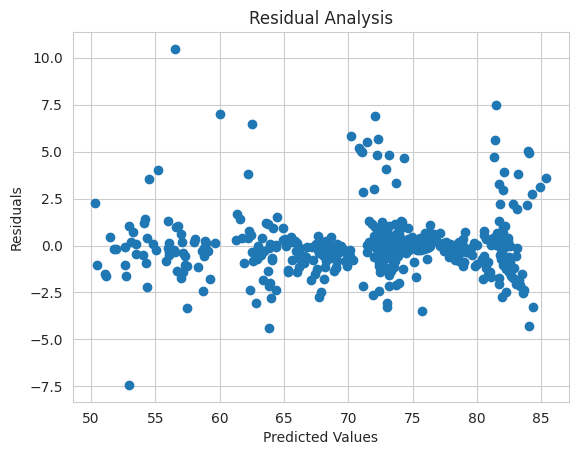

In [95]:
plt.scatter(y_pred, y_diff)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

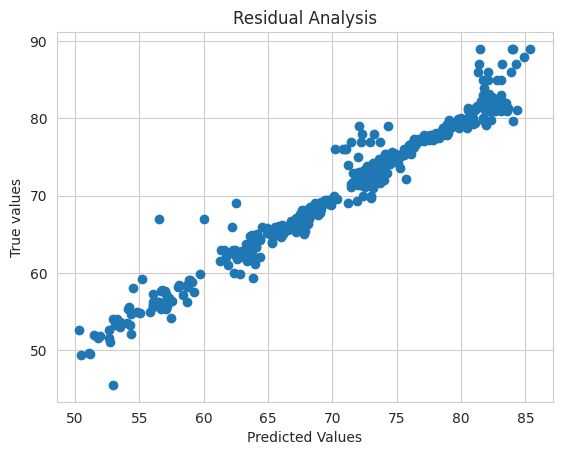

In [98]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('True values')
plt.title('Residual Analysis')
plt.show()

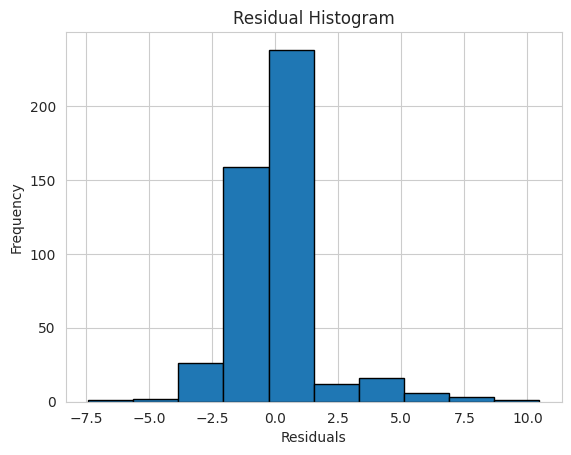

In [96]:
plt.hist(y_diff,  edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Histogram')
plt.show()

# Saving model

In [99]:
import pickle

In [103]:
pickle.dump(model,open('Life_Expectancy.pkl','wb'))